# Test on changing OSM files

## Distribution processing

In [218]:
### the values of each batch are :
intervals = np.array([[0,8],[ 8,  9],
       [ 9, 10],
       [10, 18],
       [18, 19],
       [19, 24]])
delta_intervals = intervals[:,1] -  intervals[:,0] 
average_intervals = np.mean(intervals, axis = 1)
freq_original = np.array([0.05, 0.4 , 0.7 , 0.9 , 0.4 , 0.05])
frequency = freq_original*100*delta_intervals
average_distribution = np.sum(average_intervals * frequency)/np.sum(frequency)

In [219]:
np.sum(frequency)

935.0

In [220]:
std_un = (np.sum(frequency * (average_intervals - average_distribution)**2)/(np.sum(frequency)-1))**0.5
print(std_un)

3.016603733761907


In [221]:
np.sum(np.array([0.05, 0.4 , 0.7 , 0.9 , 0.4 , 0.05]))

2.4999999999999996

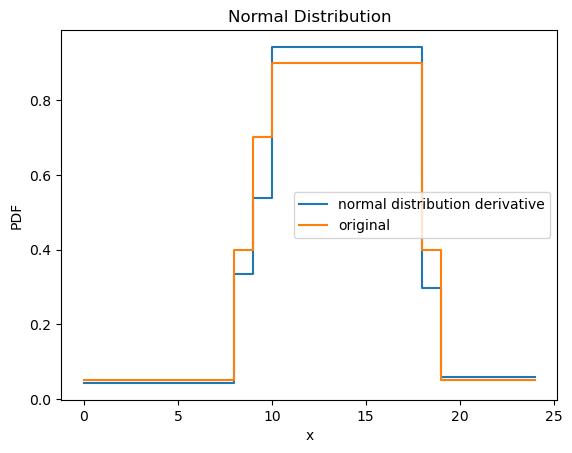

In [222]:
import numpy as np
x = np.linspace(0,24,200)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define x-range and parameters
mean = average_distribution
std =std_un

# Calculate normal PDF
def f(x):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
retainer = np.zeros(intervals.shape[0])
i = 0
for elements in intervals:
    value,error = quad(f, elements[0], elements[1])
    retainer[i] = value
    i += 1

i = 0
discrete_representation = 0.01*retainer*np.sum(frequency)/delta_intervals


line_x = np.zeros(intervals.shape[0] * intervals.shape[1])
line_y = np.zeros(intervals.shape[0] * intervals.shape[1])
line_y_original = np.zeros(intervals.shape[0] * intervals.shape[1])
for elements in intervals:
    line_x[i] = elements[0]
    line_x[i+1] = elements[1]
    line_y[i] = discrete_representation[int(i/2)]
    line_y[i+1] = discrete_representation[int(i/2)]
    line_y_original[i] = freq_original[int(i/2)]
    line_y_original[i+1] = freq_original[int(i/2)]

    i += 2
plt.plot(line_x, line_y, label = "normal distribution derivative")
plt.plot(line_x, line_y_original, label = "original")
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
#plt.plot(average_intervals, np.array([0.05, 0.4 , 0.7 , 0.9 , 0.4 , 0.05]))
plt.show()

x = discrete_representation
extracted_rows = [
    f'  {x[0]:.2f},                                   !- Value Until Time 1',
    f'  {x[1]:.2f},                                    !- Value Until Time 2',
    f'  {x[2]:.2f},                                    !- Value Until Time 3',
    f'  {x[3]:.2f},                                    !- Value Until Time 4',
    f'  {x[4]:.2f},                                    !- Value Until Time 5',
    f'  {x[0]:.2f};                                    !- Value Until Time 6',
#    f'  {x[6]:.2f},                                    !- Value Until Time 7',
#    f'  {x[7]:.2f};                                   !- Value Until Time 8'
]

In [223]:
remaining_text =[
    "No,                                     !- Interpolate to Timestep",
    '8,                                      !- Hour 1',
    '0,                                      !- Minute 1',
    '9,                                      !- Hour 2',
    '0,                                      !- Minute 2',
    '10,                                     !- Hour 3',
    '0,                                      !- Minute 3',
    '18,                                     !- Hour 4',
    '0,                                      !- Minute 4',
    '19,                                     !- Hour 5',
    '0,                                      !- Minute 5',
    '24,                                     !- Hour 6',
    '0,                                      !- Minute 6'
]

In [224]:
def remerge_text(extracted, remaining):
    """
    Remerge extracted rows back into their original configuration within the remaining text.

    Args:
        extracted (list): A list of rows containing '!- Value Until Time...'.
        remaining (str): The remaining text as a string.

    Returns:
        str: The remerged text in its original configuration.
    """
    rows = remaining
    result = []
    extracted_index = 0

    for row in rows:
        result.append("  " + row)
        if "Minute" in row:
            # Insert corresponding extracted row after 'Hour' or 'Minute' rows
            if extracted_index < len(extracted):
                result.append(extracted[extracted_index])
                extracted_index += 1

    return '\n'.join(result) + "\n \n"


# Remerge the extracted rows into the original configuration
remerged_text = remerge_text(extracted_rows, remaining_text)

# Display the remerged text
print(remerged_text)
remerged_text

  No,                                     !- Interpolate to Timestep
  8,                                      !- Hour 1
  0,                                      !- Minute 1
  0.04,                                   !- Value Until Time 1
  9,                                      !- Hour 2
  0,                                      !- Minute 2
  0.33,                                    !- Value Until Time 2
  10,                                     !- Hour 3
  0,                                      !- Minute 3
  0.54,                                    !- Value Until Time 3
  18,                                     !- Hour 4
  0,                                      !- Minute 4
  0.94,                                    !- Value Until Time 4
  19,                                     !- Hour 5
  0,                                      !- Minute 5
  0.30,                                    !- Value Until Time 5
  24,                                     !- Hour 6
  0,                     

'  No,                                     !- Interpolate to Timestep\n  8,                                      !- Hour 1\n  0,                                      !- Minute 1\n  0.04,                                   !- Value Until Time 1\n  9,                                      !- Hour 2\n  0,                                      !- Minute 2\n  0.33,                                    !- Value Until Time 2\n  10,                                     !- Hour 3\n  0,                                      !- Minute 3\n  0.54,                                    !- Value Until Time 3\n  18,                                     !- Hour 4\n  0,                                      !- Minute 4\n  0.94,                                    !- Value Until Time 4\n  19,                                     !- Hour 5\n  0,                                      !- Minute 5\n  0.30,                                    !- Value Until Time 5\n  24,                                     !- Hour 6\n  0,   

In [30]:
base_path = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\"
file_names = ["1cd34e7d-461f-4554-b970-c1d53a70670c.osm", "8599ccf2-899f-48da-aa7b-fabac2b06bae.osm", "4950d56f-f622-4353-9b10-7a58344003e7.osm"]
start_strings_1 = ["""OS:Schedule:Day,
  {7448fae4-55f5-46f3-b126-2a1a98788950}, !- Handle
  NECB-E-Lighting Default|Wkdy Day,       !- Name
  {40e2b19b-f15c-44b0-9800-46de824318f8}, !- Schedule Type Limits Name
  """,
                   """OS:Schedule:Day,
  {ccb04538-b858-4904-b299-2a6e3b7ca456}, !- Handle
  NECB-E-Lighting Default|Wkdy Day,       !- Name
  {76b4eca1-69c6-48a1-88de-80b8bf001ae2}, !- Schedule Type Limits Name
  """,
                   """OS:Schedule:Day,
  {2e9ce92e-0c98-45f2-9a3c-23579b10fc5d}, !- Handle
  NECB-C-Lighting Default|Wkdy Day,       !- Name
  {2249b564-fd27-445b-b006-591ecce57874}, !- Schedule Type Limits Name
  """]

end_strings_1 = ["""OS:Schedule:Rule,
  {1e0a7cd7-81ab-43be-83dc-7d51ee99f0f1}, !- Handle
  Schedule Rule 21,                       !- Name
  {122878c7-2b09-44a9-87d3-2c1b03315a4c}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {f5450ad6-920e-4b98-83c6-60ad623f7d07}, !- Day Schedule Name
  """,
                 """OS:Schedule:Rule,
  {9a504e3b-4cfd-43f0-bcec-ce433ec42378}, !- Handle
  Schedule Rule 21,                       !- Name
  {029fe9f7-c38f-422b-866a-1246867e8516}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {0e8e4914-9f73-42bb-a71f-ba11e10ba304}, !- Day Schedule Name
  """, 
                 """OS:Schedule:Rule,
  {1cde0d96-8456-48f1-b9ea-d374f45326e9}, !- Handle
  Schedule Rule 6,                        !- Name
  {6581341a-2b37-4efd-8efa-52f95946d0ae}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {742b87c5-e55c-491c-b990-d521ed9783f2}, !- Day Schedule Name
  """]

start_strings_2 = ["""OS:Schedule:Day,
  {adc3574f-73ce-4012-ab0a-1879d88c4f96}, !- Handle
  NECB-E-Electric-Equipment Default|Wkdy Day, !- Name
  {40e2b19b-f15c-44b0-9800-46de824318f8}, !- Schedule Type Limits Name
  """,
                   """OS:Schedule:Day,
  {81bdbe07-b639-4e10-ae87-74c1d1157db7}, !- Handle
  NECB-E-Electric-Equipment Default|Wkdy Day, !- Name
  {76b4eca1-69c6-48a1-88de-80b8bf001ae2}, !- Schedule Type Limits Name
  """,
                   """OS:Schedule:Day,
  {c761681a-eace-494b-9b1f-bedc2950dd34}, !- Handle
  NECB-C-Electric-Equipment Default|Wkdy Day, !- Name
  {2249b564-fd27-445b-b006-591ecce57874}, !- Schedule Type Limits Name
  """]
end_strings_2 = ["""OS:Schedule:Rule,
  {3460b600-a1a1-4b25-8898-417eba111b31}, !- Handle
  Schedule Rule 24,                       !- Name
  {3aad8fe6-0874-4c14-8397-921dcedab202}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {0acb1c3e-e5f2-4761-8729-54147116b0b6}, !- Day Schedule Name
  """,
                """OS:Schedule:Rule,
  {8b0e213e-5160-4ce4-b1fe-b30d945266e8}, !- Handle
  Schedule Rule 24,                       !- Name
  {1ccfd961-8dea-4cb9-b548-7c27cfae2ae1}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {dff780cb-ddb3-4bbb-bb70-13f3e464482b}, !- Day Schedule Name
  """,
                 """OS:Schedule:Rule,
  {0f0d5a32-d844-4222-90b0-8e28591555c5}, !- Handle
  Schedule Rule 9,                        !- Name
  {93186698-11d7-438d-9ee2-074dfe04c786}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {f4c7d06a-c2fe-4a3d-bacf-995bdb82781b}, !- Day Schedule Name
  """]

def change_schedule(osm_file_path, start_strings_1, start_strings_2, end_strings_1, end_strings_2):
    # Read the OSM file as a text file
    print(osm_file_path)
    with open(osm_file_path, 'r') as file:
        osm_content = file.readlines()
    # Define the strings to locate the sections to remove
    osm_full_text = ''.join(osm_content)

    start_string = start_strings_1
    end_string = end_strings_1

    # Find the positions of the strings
    start_index = osm_full_text.find(start_string)
    end_index = osm_full_text.find(end_string)
    print(start_index)
    print(end_index)

    # Ensure the indices are valid
    if start_index != -1 and end_index != -1 and start_index < end_index:
        # Remove the text between the two strings
        modified_text = osm_full_text[:start_index + len(start_string)] + remerged_text + "\n\n" + osm_full_text[end_index:]
    else:
        modified_text = osm_full_text  # If indices are invalid, return the original text

    removed_text = osm_full_text[start_index + len(start_string):end_index]
    print(removed_text)
    start_string = start_strings_2
    end_string = end_strings_2

    # Find the positions of the strings
    start_index = modified_text.find(start_string)
    end_index = modified_text.find(end_string)
    print(start_index)
    print(end_index)

    # Ensure the indices are valid
    if start_index != -1 and end_index != -1 and start_index < end_index:
        # Remove the text between the two strings
        modified_text_2 = modified_text[:start_index + len(start_string)] + remerged_text + "\n\n" + modified_text[end_index:]
    else:
        modified_text_2 = modified_text  # If indices are invalid, return the original text

    # Extract the removed text between the start and end strings
    removed_text = modified_text[start_index + len(start_string):end_index]    

    # Extract the removed text between the start and end strings
    
    removed_text = modified_text[start_index + len(start_string):end_index]
    print(removed_text)
    return modified_text_2

In [316]:
index = 0
model_0_text = change_schedule(base_path + file_names[index], start_strings_1[index], start_strings_2[index], end_strings_1[index], end_strings_2[index])
index = 1
model_1_text = change_schedule(base_path + file_names[index], start_strings_1[index], start_strings_2[index], end_strings_1[index], end_strings_2[index])
index = 2
model_2_text = change_schedule(base_path + file_names[index], start_strings_1[index], start_strings_2[index], end_strings_1[index], end_strings_2[index])

D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\1cd34e7d-461f-4554-b970-c1d53a70670c.osm
156531
157811
No,                                     !- Interpolate to Timestep
  8,                                      !- Hour 1
  0,                                      !- Minute 1
  0.05,                                   !- Value Until Time 1
  9,                                      !- Hour 2
  0,                                      !- Minute 2
  0.4,                                    !- Value Until Time 2
  10,                                     !- Hour 3
  0,                                      !- Minute 3
  0.7,                                    !- Value Until Time 3
  18,                                     !- Hour 4
  0,                                      !- Minute 4
  0.9,                                    !- Value Until Time 4
  19,                                     !- Hour 5
  0,                                      !- Minute 5
  0.4,

In [317]:
base_path

'D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\'

In [318]:
destination

'D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\\\history\\1736727611.32974174950d56f-f622-4353-9b10-7a58344003eschedule_change_resistance_change.osm'

In [319]:
# Data to append
current_seconds = time.time()
for i in range(3):
    osm_file_path = base_path + file_names[i][:-5] + "schedule_change" + ".osm"
    if os.path.exists(osm_file_path):
        destination = base_path + "\\history\\" +f"{current_seconds}"+ file_names[i][:-5] + "schedule_change" + ".osm"
        shutil.move(osm_file_path, destination)
        os.remove(destination)
        print("File deleted successfully.")
    else:
        print("The file does not exist.")
    # Append to the file
    with open(osm_file_path, "a") as file:
        file.write(model_0_text)

File deleted successfully.
File deleted successfully.
File deleted successfully.


In [228]:
modified_text

'\nOS:Version,\n  {3d382681-bbad-424e-b7b3-60209b9f46a8}, !- Handle\n  3.7.0;                                  !- Version Identifier\n\nOS:ScheduleTypeLimits,\n  {2a608b53-5609-47ff-a807-6df1bb886cd3}, !- Handle\n  Always On Discrete Limits,              !- Name\n  0,                                      !- Lower Limit Value\n  1,                                      !- Upper Limit Value\n  Discrete,                               !- Numeric Type\n  Availability;                           !- Unit Type\n\nOS:Site,\n  {33a21b25-cf6d-422d-a9eb-73fff61b16f2}, !- Handle\n  Calgary Intl AP_AB_CAN,                 !- Name\n  51.11,                                  !- Latitude {deg}\n  -114.02,                                !- Longitude {deg}\n  -7,                                     !- Time Zone {hr}\n  1084.1,                                 !- Elevation {m}\n  City;                                   !- Terrain\n\nOS:SimulationControl,\n  {d3748db6-90a4-4abf-9b1d-f90d7eeae2bb}, !- Handle\n 

In [229]:
start_string = """OS:Schedule:Day,
  {adc3574f-73ce-4012-ab0a-1879d88c4f96}, !- Handle
  NECB-E-Electric-Equipment Default|Wkdy Day, !- Name
  {40e2b19b-f15c-44b0-9800-46de824318f8}, !- Schedule Type Limits Name
"""
end_string = """OS:Schedule:Rule,
  {3460b600-a1a1-4b25-8898-417eba111b31}, !- Handle
  Schedule Rule 24,                       !- Name
  {3aad8fe6-0874-4c14-8397-921dcedab202}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {0acb1c3e-e5f2-4761-8729-54147116b0b6}, !- Day Schedule Name"""

# Find the positions of the strings
start_index = modified_text.find(start_string)
end_index = modified_text.find(end_string)

# Ensure the indices are valid
if start_index != -1 and end_index != -1 and start_index < end_index:
    # Remove the text between the two strings
    modified_text_2 = modified_text[:start_index + len(start_string)] + remerged_text + "\n\n" + modified_text[end_index:]
else:
    modified_text_2 = modified_text  # If indices are invalid, return the original text

# Extract the removed text between the start and end strings
removed_text = osm_full_text[start_index + len(start_string):end_index]
print(removed_text)


                                  !- Interpolate to Timestep
  8,                                      !- Hour 1
  0,                                      !- Minute 1
  0.05,                                   !- Value Until Time 1
  9,                                      !- Hour 2
  0,                                      !- Minute 2
  0.4,                                    !- Value Until Time 2
  10,                                     !- Hour 3
  0,                                      !- Minute 3
  0.7,                                    !- Value Until Time 3
  18,                                     !- Hour 4
  0,                                      !- Minute 4
  0.9,                                    !- Value Until Time 4
  19,                                     !- Hour 5
  0,                                      !- Minute 5
  0.4,                                    !- Value Until Time 5
  24,                                     !- Hour 6
  0,                                 

In [191]:
start_index

164689

In [28]:
file_path = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\"
source_file_name = "1cd34e7d-461f-4554-b970-c1d53a70670schedule_change.osm"
writiing_file_name = "1cd34e7d-461f-4554-b970-c1d53a70670schedule_changresistance_change.osm"
source_file_path = file_path + source_file_name

In [42]:
import shutil
import os

import time
def change_resistance(source_file_path, factor, year):
    # Function to modify conductivity values
    with open(source_file_path, 'r') as file:
        lines = file.readlines()

    updated_lines = []
    value_index = 0  # To track which new value to use
    factor = 2
    for line in lines:
        if "conductivity" in line.lower():
            try:
                # Extract the portion before the value
                prefix = line.split(",")[0]
                suffix = line.split(",", 1)[1]
                # Replace the value with the new one
                updated_line = f"{float(prefix) * factor}, {suffix}"
                updated_lines.append(updated_line)
                value_index += 1
            except:
                print(line)
        elif "calendar year" in line.lower():
            try:
                # Extract the portion before the value
                prefix = line.split(",")[0]
                suffix = line.split(",", 1)[1]
                # Replace the value with the new one
                updated_line = f"{year}, {suffix}"
                updated_lines.append(updated_line)
                print(updated_line)

                value_index += 1
            except:
                print(line)
        elif "Day of Week for Start Day".lower() in line.lower():
            try:
                # Extract the portion before the value
                prefix = line.split(";")[0]
                suffix = line.split(";", 1)[1]
                # Replace the value with the new one
                updated_line = f"; {suffix}"
                updated_lines.append(updated_line)
                print(updated_line)
                value_index += 1
            except:
                print(line)
        else:
            updated_lines.append(line)
    
    return updated_lines



# Data to append
current_seconds = time.time()
for i in range(3):
    osm_file_path = base_path + file_names[i][:-5] + "schedule_change" + ".osm"
    updated_lines = change_resistance(osm_file_path, 2, 2020)
    writing_path = base_path + file_names[i][:-5] + "schedule_change" + "_resistance_change" + ".osm"
    destination = base_path + "\\history\\" +f"{current_seconds}"+ file_names[i][:-5] + "schedule_change" + "_resistance_change" + ".osm"

    if os.path.exists(writing_path):
        shutil.move(writing_path, destination)
        print("File deleted successfully.")
    else:
        print("The file does not exist.")
    
    with open(writing_path, 'w') as file:
        file.writelines(updated_lines)
    print("File updated successfully.")


2020,                                        !- Calendar Year

;                                  !- Day of Week for Start Day

  ,                                       !- Soil Conductivity {W/m-K}

File deleted successfully.
File updated successfully.
2020,                                        !- Calendar Year

;                                  !- Day of Week for Start Day

  ,                                       !- Soil Conductivity {W/m-K}

File deleted successfully.
File updated successfully.
2020,                                        !- Calendar Year

;                                  !- Day of Week for Start Day

  ,                                       !- Soil Conductivity {W/m-K}

File deleted successfully.
File updated successfully.


## exemple de rouler des simulations par python 

In [426]:
import subprocess

# Path to the executable file
software_path = "D:\\openstudio-3.7.0\\bin\\openstudio.exe"

# Arguments for the software
arguments = [
    "run",
    "--workflow",
    r"D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\run_2\worflow.osw"
]
# Run the software with arguments
result = subprocess.run([software_path] + arguments, capture_output=True, text=True, shell=True)


In [427]:
result

CompletedProcess(args=['D:\\openstudio-3.7.0\\bin\\openstudio.exe', 'run', '--workflow', 'D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\run_2\\worflow.osw'], returncode=0, stdout='ExpandObjects Started.\nNo expanded file generated.\nExpandObjects Finished. Time:     0.000\nRunEnergyPlus: Completed Successfully with \x1b0 Fatal Errors, \x1b\x1b0 Severe Errors, \x1b\x1b63 Warnings.\x1b\n', stderr='')

# Reseaux neuronnes, méthode de régression avec l'intelligence artificielle

## formattage des donnees pour les reseaux neurones

### fonction finale

In [450]:
def generate_tensors(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to fetch the entire dataset for "Electricity:Facility"
    query_full_data = """
    SELECT TimeIndex, Value 
    FROM ReportData 
    WHERE ReportDataDictionaryIndex IN (
        SELECT ReportDataDictionaryIndex 
        FROM ReportDataDictionary 
        WHERE Name = 'ElectricityNet:Facility'
    );
    """

    # Execute the query and fetch the data
    cursor.execute(query_full_data)
    full_data = cursor.fetchall()

    # Close the database connection

    # Create a DataFrame from the data
    full_df = pd.DataFrame(full_data, columns=['TimeIndex', 'Value (Joules)'])
    
    # Get the timestamps data
    query_full_data ="""SELECT 
    TimeIndex,
    Year,
    Month,
    Day
    FROM Time;"""
    cursor.execute(query_full_data)
    full_data = cursor.fetchall()
    full_df_timestamps = pd.DataFrame(full_data, columns=['TimeIndex', 'year','month', 'day'])
    full_df_timestamps["date"] = pd.to_datetime(full_df_timestamps[['year', 'month', 'day']]).dt.day_name()
    full_df_timestamps["weekend_bpool"] = (full_df_timestamps["date"] == "Sunday") | (full_df_timestamps["date"] == "Saturday")
    full_df_timestamps[full_df_timestamps["weekend_bpool"]]
    full_df_timestamps.set_index('TimeIndex', inplace=True)
    full_df.set_index('TimeIndex', inplace=True)
    
    ### advanced key_based filtering, I have always known True False filtering, but I do not know it works on matrix of differenc sizes, go figure
    week_day = full_df[~full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]]
    week_day_filter = ~full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]
    week_end = full_df[full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]]
    week_end_filter = full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]
    week_day["norm_hours"] = (week_day.index/6)%24
    week_end["norm_hours"] = (week_end.index/6)%24
    
    ### neural network worthy tensors
    y_data = torch.zeros((262,1,24))
    for i in range(24):
        y_data[:,0,i] = torch.tensor(week_day[week_day["norm_hours"] == i]["Value (Joules)"].values)
        
    y_mins = y_data.min()
    y_max = y_data.max()
    y_data_normal = (y_data - y_mins)/(y_max - y_mins)
    
    return y_data_normal, week_day_filter, week_end_filter

3.41.2


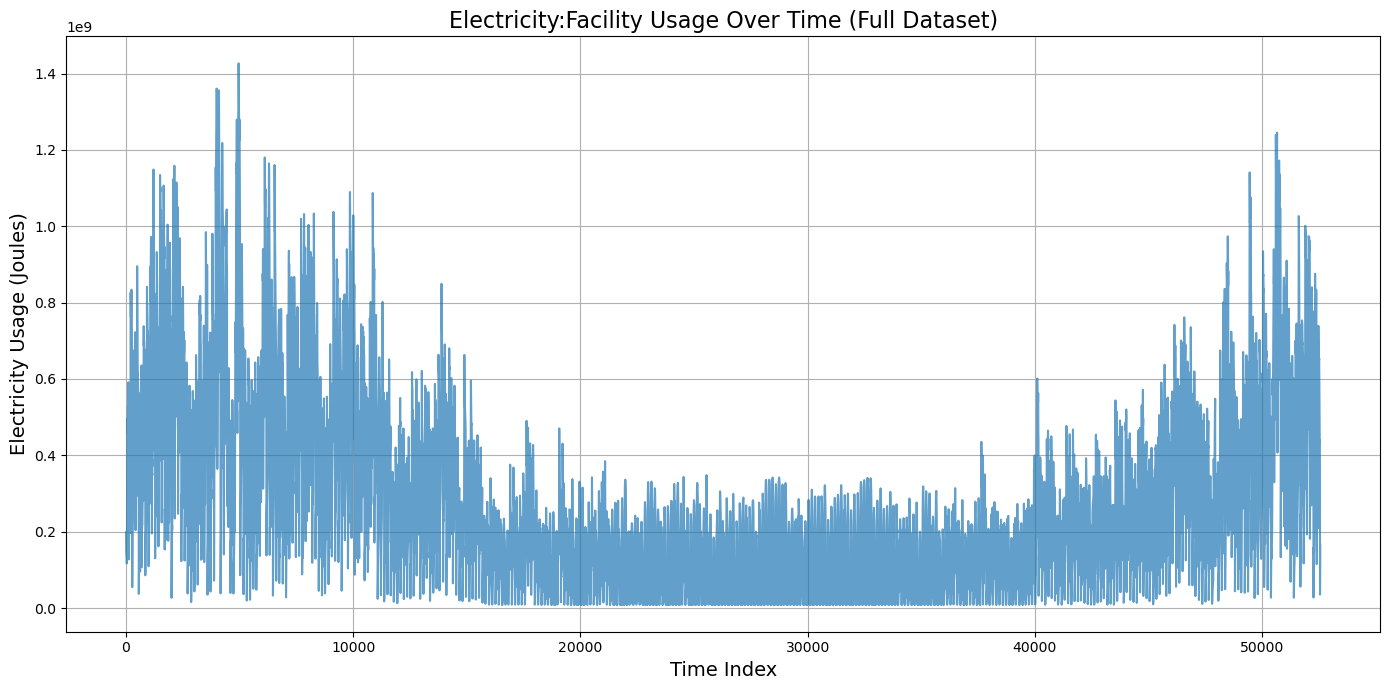

In [435]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
print(sqlite3.sqlite_version)

# Connect to the SQLite database
db_path = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\run\\eplusout.sql"  # Replace with your actual file path
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Query to fetch the entire dataset for "Electricity:Facility"
query_full_data = """
SELECT TimeIndex, Value 
FROM ReportData 
WHERE ReportDataDictionaryIndex IN (
    SELECT ReportDataDictionaryIndex 
    FROM ReportDataDictionary 
    WHERE Name = 'ElectricityNet:Facility'
);
"""

# Execute the query and fetch the data
cursor.execute(query_full_data)
full_data = cursor.fetchall()

# Close the database connection

# Create a DataFrame from the data
full_df = pd.DataFrame(full_data, columns=['TimeIndex', 'Value (Joules)'])

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(full_df['TimeIndex'], full_df['Value (Joules)'], alpha=0.7, linestyle='-')
plt.title("Electricity:Facility Usage Over Time (Full Dataset)", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Electricity Usage (Joules)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [441]:
query_full_data ="""SELECT 
    TimeIndex,
    Year,
    Month,
    Day
FROM Time;"""
cursor.execute(query_full_data)
full_data = cursor.fetchall()
full_df_timestamps = pd.DataFrame(full_data, columns=['TimeIndex', 'year','month', 'day'])
full_df_timestamps["date"] = pd.to_datetime(full_df_timestamps[['year', 'month', 'day']]).dt.day_name()
full_df_timestamps["weekend_bpool"] = (full_df_timestamps["date"] == "Sunday") | (full_df_timestamps["date"] == "Saturday")
full_df_timestamps[full_df_timestamps["weekend_bpool"]]
full_df_timestamps.set_index('TimeIndex', inplace=True)
full_df.set_index('TimeIndex', inplace=True)

In [442]:
full_df

,Value (Joules)
TimeIndex,
6,1.983481e+08
12,1.479423e+08
18,1.424406e+08
24,1.364051e+08
30,1.321291e+08
...,...
52536,4.352976e+08
52542,4.391673e+08
52548,3.524328e+07


In [443]:
full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]

TimeIndex
6        False
12       False
18       False
24       False
30       False
         ...  
52536    False
52542    False
52548    False
52554    False
52560    False
Name: weekend_bpool, Length: 8760, dtype: bool

In [444]:
### advanced key_based filtering, I have always known True False filtering, but I do not know it works on matrix of differenc sizes, go figure
week_day = full_df[~full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]]
week_day_filter = ~full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]
week_end = full_df[full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]]
week_end_filter = full_df_timestamps[(full_df_timestamps.index%6 == 0)]["weekend_bpool"]


In [420]:
week_end

,Value (Joules)
TimeIndex,
438,4.672927e+08
444,4.538897e+08
450,3.834089e+08
456,3.766287e+08
462,3.742581e+08
...,...
51960,8.513592e+08
51966,8.291899e+08
51972,1.927213e+08


In [232]:
week_day["norm_hours"] = (week_day.index/6)%24

C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\3563920763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_day["norm_hours"] = (week_day.index/6)%24


In [237]:
y_data = torch.zeros((262,1,24))

In [250]:
for i in range(24):
    y_data[:,0,i] = torch.tensor(week_day[week_day["norm_hours"] == i]["Value (Joules)"].values)

In [251]:
y_data[260,0,:]

tensor([2.8448e+08, 1.4040e+08, 1.4708e+08, 1.4998e+08, 1.8424e+08, 2.0162e+08,
        1.9921e+08, 2.1961e+08, 3.9970e+08, 5.2634e+08, 8.7534e+08, 7.6855e+08,
        7.3061e+08, 6.9636e+08, 6.7446e+08, 7.2385e+08, 7.7221e+08, 8.1514e+08,
        8.3378e+08, 8.1885e+08, 7.0106e+08, 7.3499e+08, 1.1511e+08, 2.2014e+08])

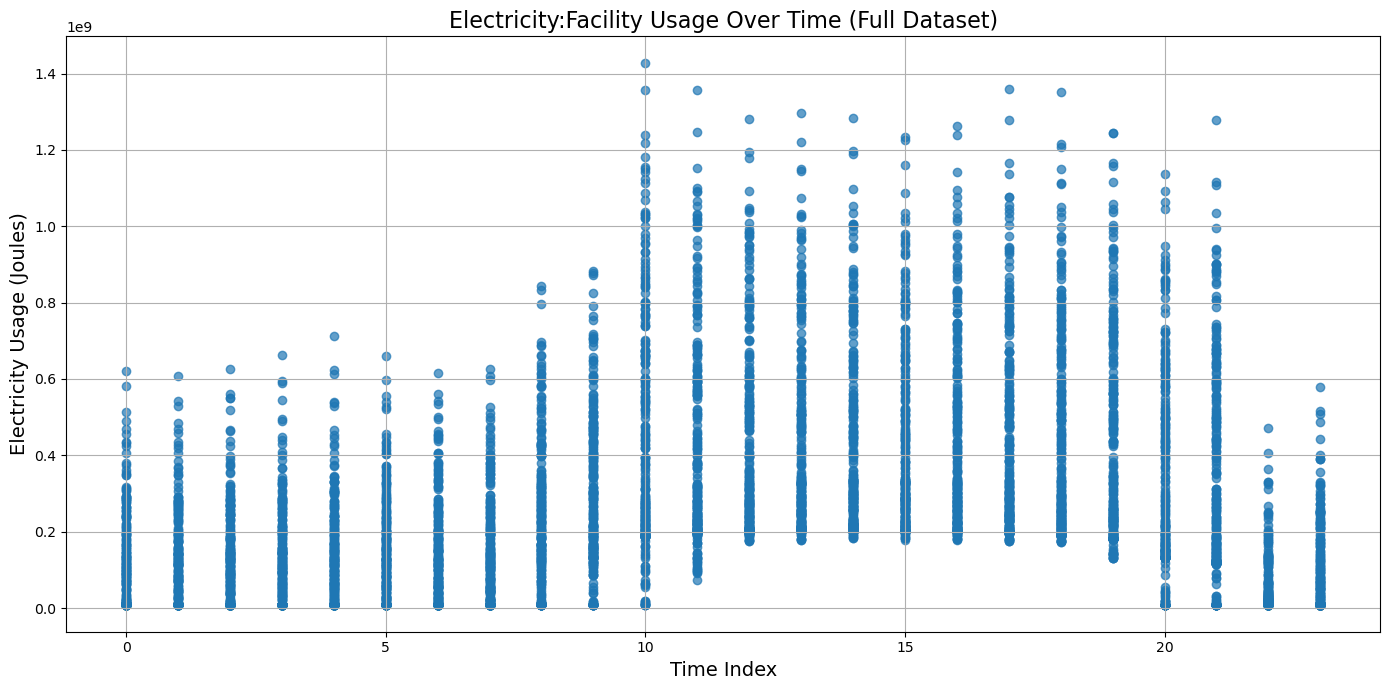

In [164]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(week_day["norm_hours"], week_day['Value (Joules)'], alpha=0.7, linestyle='-')
plt.title("Electricity:Facility Usage Over Time (Full Dataset)", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Electricity Usage (Joules)", fontsize=14)
plt.grid(True)


plt.tight_layout()
plt.show()


## import and processing weather file data

### data fetching function

In [431]:
import pandas as pd
import matplotlib.pyplot as plt

def import_weather_data(week_day_filter, epw_file_path):
    try:
        # Read the file, skipping the initial header rows as per EPW format
        epw_data = pd.read_csv(epw_file_path, skiprows=8, header=None)
        epw_data.columns = [
            "Year", "Month", "Day", "Hour", "Minute", "DataSource", "DryBulbTemp", "DewPointTemp",
            "RelativeHumidity", "AtmosphericStationPressure", "ExtraterrestrialHorizontalRadiation",
            "ExtraterrestrialDirectNormalRadiation", "HorizontalInfraredRadiationIntensity",
            "GlobalHorizontalRadiation", "DirectNormalRadiation", "DiffuseHorizontalRadiation",
            "GlobalHorizontalIlluminance", "DirectNormalIlluminance", "DiffuseHorizontalIlluminance",
            "ZenithLuminance", "WindDirection", "WindSpeed", "TotalSkyCover", "OpaqueSkyCover",
            "Visibility", "CeilingHeight", "PresentWeatherObservation", "PresentWeatherCodes",
            "PrecipitableWater", "AerosolOpticalDepth", "SnowDepth", "DaysSinceLastSnowfall",
            "Albedo", "LiquidPrecipitationDepth", "LiquidPrecipitationQuantity"
        ]
        
        important_w_data = epw_data[["DryBulbTemp","WindSpeed","GlobalHorizontalIlluminance"]]
        important_w_data["TimeIndex"] = (important_w_data.index + 1)*6
        important_w_data.set_index('TimeIndex', inplace=True)

        ## filtering for week day 
        week_day_weather = important_w_data[week_day_filter]
        week_day_weather["norm_hours"] = (week_day_weather.index/6)%24
        
        ## preparing the tensors
        x_data = torch.zeros((262,3,24))
        for i in range(24):
            x_data[:,:,i] = torch.tensor(week_day_weather[week_day_weather["norm_hours"] == i][["DryBulbTemp","WindSpeed","GlobalHorizontalIlluminance"]].values)
        
        ## normalizing tensors
        x_maxes,i = x_data[:,:,:].max(axis = 0)
        x_maxes,_ = x_maxes.max(axis = 1)
        x_maxes = x_maxes.view(1,3,1)
        normalized_data = (x_data - x_mins)/(x_maxes - x_mins)
        return normalized_data
    except Exception as e:
        print(f"An error occurred: {e}")



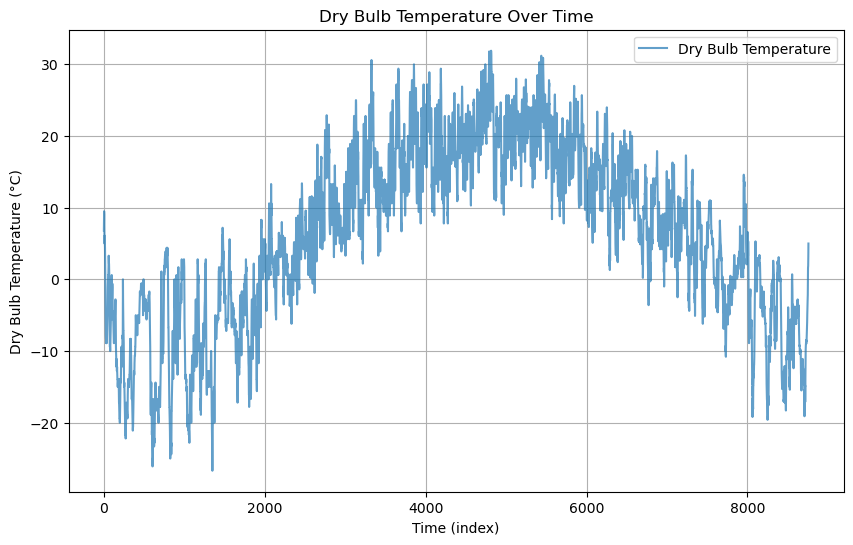

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the uploaded EPW file
epw_file_path = ".\\commerce_basic_generation\\results\\in.osm\\CAN_PQ_Montreal.Intl.AP.716270_CWEC.epw"

# Load the EPW file into a pandas DataFrame
try:
    # Read the file, skipping the initial header rows as per EPW format
    epw_data = pd.read_csv(epw_file_path, skiprows=8, header=None)
    epw_data.columns = [
        "Year", "Month", "Day", "Hour", "Minute", "DataSource", "DryBulbTemp", "DewPointTemp",
        "RelativeHumidity", "AtmosphericStationPressure", "ExtraterrestrialHorizontalRadiation",
        "ExtraterrestrialDirectNormalRadiation", "HorizontalInfraredRadiationIntensity",
        "GlobalHorizontalRadiation", "DirectNormalRadiation", "DiffuseHorizontalRadiation",
        "GlobalHorizontalIlluminance", "DirectNormalIlluminance", "DiffuseHorizontalIlluminance",
        "ZenithLuminance", "WindDirection", "WindSpeed", "TotalSkyCover", "OpaqueSkyCover",
        "Visibility", "CeilingHeight", "PresentWeatherObservation", "PresentWeatherCodes",
        "PrecipitableWater", "AerosolOpticalDepth", "SnowDepth", "DaysSinceLastSnowfall",
        "Albedo", "LiquidPrecipitationDepth", "LiquidPrecipitationQuantity"
    ]
    # Plot Dry Bulb Temperature over time
    plt.figure(figsize=(10, 6))
    plt.plot(epw_data.index, epw_data["DryBulbTemp"], label="Dry Bulb Temperature", alpha=0.7)
    plt.title("Dry Bulb Temperature Over Time")
    plt.xlabel("Time (index)")
    plt.ylabel("Dry Bulb Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")


In [208]:
important_w_data = epw_data[["DryBulbTemp","WindSpeed","GlobalHorizontalIlluminance"]]
important_w_data["TimeIndex"] = (important_w_data.index + 1)*6
important_w_data.set_index('TimeIndex', inplace=True)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\103381612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_w_data["TimeIndex"] = (important_w_data.index + 1)*6


In [217]:
important_w_data["GlobalHorizontalIlluminance"].mean()

18050.36529680365

In [210]:
week_day_weather = important_w_data[week_day_filter]
week_day_weather["norm_hours"] = (week_day_weather.index/6)%24

C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\2177377539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_day_weather["norm_hours"] = (week_day_weather.index/6)%24


In [421]:
week_day_weather

,DryBulbTemp,WindSpeed,GlobalHorizontalIlluminance,norm_hours
TimeIndex,,,,
6,6.8,7.2,0,1.0
12,8.3,6.7,0,2.0
18,9.2,8.1,0,3.0
24,9.5,7.2,0,4.0
30,9.3,7.2,0,5.0
...,...,...,...,...
52536,1.7,1.9,0,20.0
52542,1.9,2.5,0,21.0
52548,2.4,3.1,0,22.0


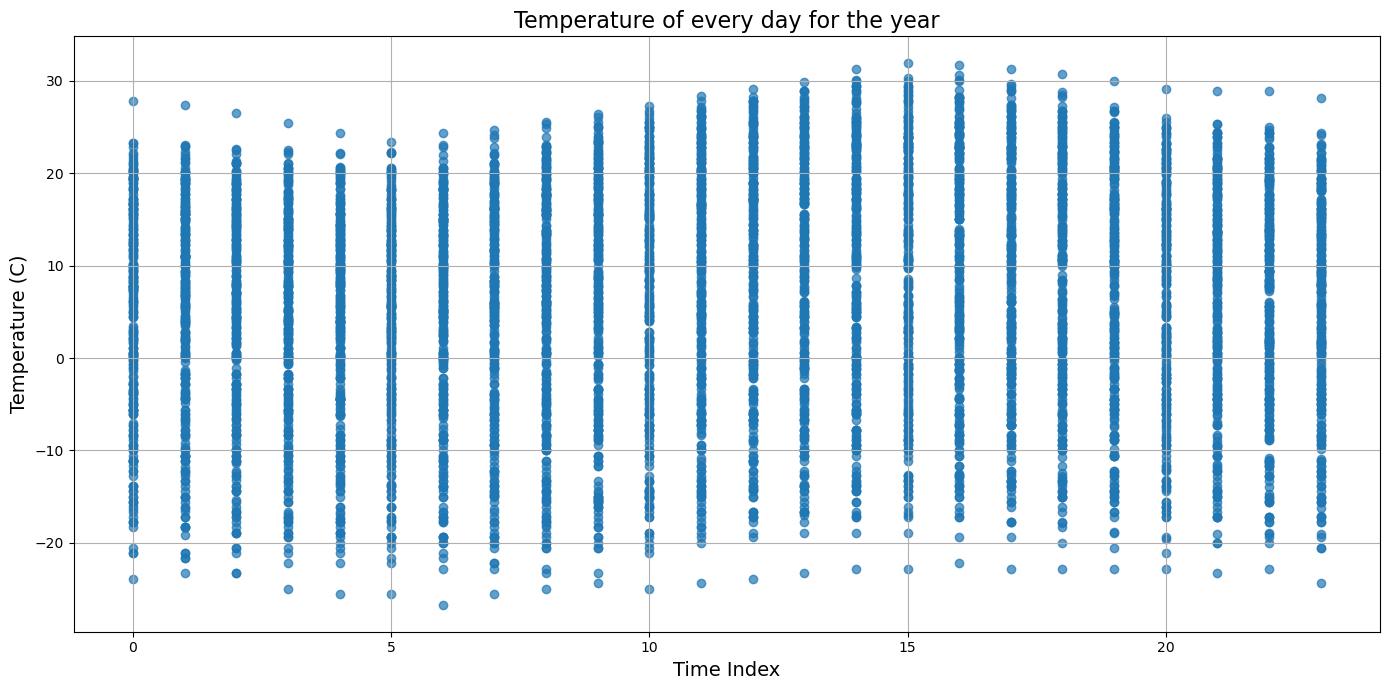

In [422]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(week_day_weather["norm_hours"], week_day_weather['DryBulbTemp'], alpha=0.7, linestyle='-')
plt.title("Temperature of every day for the year", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


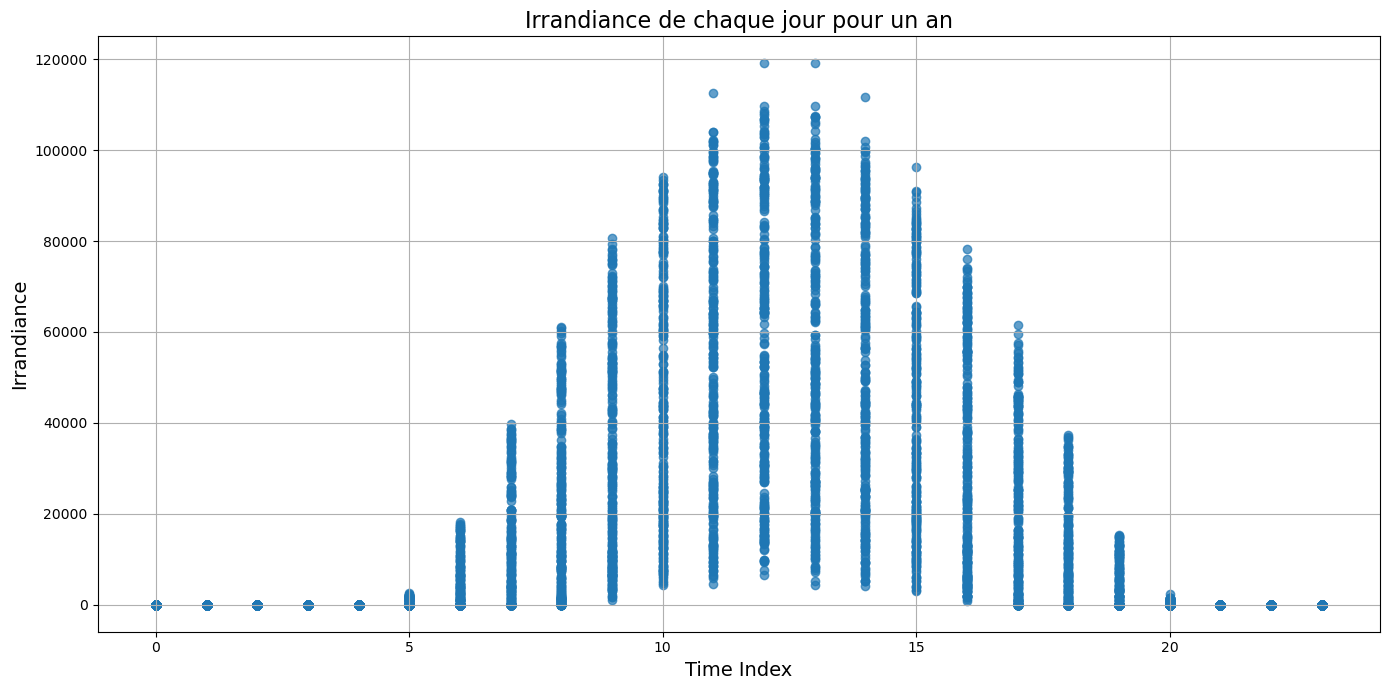

In [423]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(week_day_weather["norm_hours"], week_day_weather["GlobalHorizontalIlluminance"], alpha=0.7, linestyle='-')
plt.title("Irrandiance de chaque jour pour un an", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Irrandiance", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [253]:
x_data = torch.zeros((262,3,24))

In [260]:
for i in range(24):
    x_data[:,:,i] = torch.tensor(week_day_weather[week_day_weather["norm_hours"] == i][["DryBulbTemp","WindSpeed","GlobalHorizontalIlluminance"]].values)

In [301]:
x_mins,i = x_data[:,:,:].min(axis = 0)
x_mins,_ = x_mins.min(axis = 1)
x_mins = x_mins.view(1,3,1)

In [302]:
x_mins 

tensor([-26.7000,   0.0000,   0.0000])

In [307]:
x_data[:,:,:].max(axis = 0)

AttributeError: 'torch.return_types.max' object has no attribute 'shape'

In [428]:
x_maxes,i = x_data[:,:,:].max(axis = 0)
x_maxes,_ = x_maxes.max(axis = 1)
x_maxes = x_maxes.view(1,3,1)

In [429]:
normalized_data = (x_data - x_mins)/(x_maxes - x_mins)

In [430]:
normalized_data

tensor([[[0.3328, 0.5717, 0.5973,  ..., 0.4266, 0.3805, 0.3515],
         [0.3472, 0.5000, 0.4653,  ..., 0.4444, 0.5208, 0.4028],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.4078, 0.3225, 0.3140,  ..., 0.3601, 0.3703, 0.3703],
         [0.3681, 0.4444, 0.1944,  ..., 0.3056, 0.2153, 0.3681],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3515, 0.4078, 0.4369,  ..., 0.4659, 0.4454, 0.3891],
         [0.8681, 0.4028, 0.7708,  ..., 0.7500, 0.9861, 0.7708],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.1826, 0.2645, 0.2611,  ..., 0.2014, 0.1928, 0.1297],
         [0.0000, 0.2917, 0.2917,  ..., 0.0000, 0.0000, 0.1181],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3089, 0.1724, 0.1928,  ..., 0.3020, 0.3106, 0.3089],
         [0.3889, 0.0000, 0.0000,  ..., 0.3264, 0.2500, 0.3264],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

 

In [323]:
y_mins = y_data.min()
y_max = y_data.max()
y_data_normal = (y_data - y_mins)/(y_max - y_mins)

In [326]:
from torch.utils.data import DataLoader, TensorDataset


In [328]:
dataset = TensorDataset(normalized_data, y_data_normal)

## code to write the neural network - "upscaling"

In [222]:
import torch
import torch.nn as nn
from torchsummary import summary

In [400]:
DEVICE = "cuda"
# Define the Multi-Layer Linear Model
class MultiLayerLinearModel(nn.Module):
    def __init__(self):
        super(MultiLayerLinearModel, self).__init__()
        # Layer 1: Input (3) -> Hidden (16)
        self.layer1 = nn.Linear(3, 30)
        # Layer 2: Hidden (16) -> Hidden (8)
        self.layer2 = nn.Linear(30, 8)
        # Layer 3: Hidden (8) -> Output (1)
        self.layer3 = nn.Linear(8, 1)
        # Activation function (ReLU)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Transpose input to (N, 24, 3) to apply layers along the feature dimension
        x = x.transpose(1, 2)  # Shape: (N, 24, 3)
        # Layer 1
        x = self.layer1(x)     # Shape: (N, 24, 16)
        x = self.relu(x)
        # Layer 2
        x = self.layer2(x)     # Shape: (N, 24, 8)
        x = self.relu(x)
        # Layer 3
        x = self.layer3(x)     # Shape: (N, 24, 1)
        # Transpose back to (N, 1, 24)
        x = x.transpose(1, 2)
        return x

# Instantiate the model
model = MultiLayerLinearModel().to(DEVICE)

# Test the model with a random input tensor of shape (N, 3, 24)
N = 20  # Batch size
input_tensor = torch.randn(N, 3, 24).to(DEVICE)
output_tensor = model(input_tensor)

print("Input shape:", input_tensor.shape)
print("Output shape:", output_tensor.shape)


Input shape: torch.Size([20, 3, 24])
Output shape: torch.Size([20, 1, 24])


In [401]:
summary(model, input_size=(3, 24))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 24, 30]             120
              ReLU-2               [-1, 24, 30]               0
            Linear-3                [-1, 24, 8]             248
              ReLU-4                [-1, 24, 8]               0
            Linear-5                [-1, 24, 1]               9
Total params: 377
Trainable params: 377
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [406]:
# Hyperparameters
batch_size = 20
learning_rate = 0.0001
epochs = 200

# Initialize dataset and dataloaders
#train_dataset = SyntheticDataset(size=800)
#test_dataset = SyntheticDataset(size=200)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
print("Training the model...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs.to(DEVICE))  # Forward pass
        loss = criterion(outputs.to(DEVICE)*2, labels.to(DEVICE)*2)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")
    
    
"""
# Evaluation Loop
print("\nEvaluating the model...")
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print(f"Test Loss: {test_loss / len(test_loader):.4f}")
"""

Training the model...
Epoch 1/200, Loss: 0.0450
Epoch 2/200, Loss: 0.0463
Epoch 3/200, Loss: 0.0500
Epoch 4/200, Loss: 0.0443
Epoch 5/200, Loss: 0.0451
Epoch 6/200, Loss: 0.0487
Epoch 7/200, Loss: 0.0476
Epoch 8/200, Loss: 0.0468
Epoch 9/200, Loss: 0.0462
Epoch 10/200, Loss: 0.0455
Epoch 11/200, Loss: 0.0437
Epoch 12/200, Loss: 0.0434
Epoch 13/200, Loss: 0.0466
Epoch 14/200, Loss: 0.0432
Epoch 15/200, Loss: 0.0434
Epoch 16/200, Loss: 0.0433
Epoch 17/200, Loss: 0.0439
Epoch 18/200, Loss: 0.0442
Epoch 19/200, Loss: 0.0454
Epoch 20/200, Loss: 0.0453
Epoch 21/200, Loss: 0.0476
Epoch 22/200, Loss: 0.0451
Epoch 23/200, Loss: 0.0432
Epoch 24/200, Loss: 0.0468
Epoch 25/200, Loss: 0.0442
Epoch 26/200, Loss: 0.0458
Epoch 27/200, Loss: 0.0433
Epoch 28/200, Loss: 0.0425
Epoch 29/200, Loss: 0.0460
Epoch 30/200, Loss: 0.0432
Epoch 31/200, Loss: 0.0485
Epoch 32/200, Loss: 0.0450
Epoch 33/200, Loss: 0.0431
Epoch 34/200, Loss: 0.0435
Epoch 35/200, Loss: 0.0426
Epoch 36/200, Loss: 0.0484
Epoch 37/200, L

'\n# Evaluation Loop\nprint("\nEvaluating the model...")\nmodel.eval()\ntest_loss = 0.0\nwith torch.no_grad():\n    for inputs, labels in test_loader:\n        outputs = model(inputs)\n        loss = criterion(outputs, labels)\n        test_loss += loss.item()\n\nprint(f"Test Loss: {test_loss / len(test_loader):.4f}")\n'

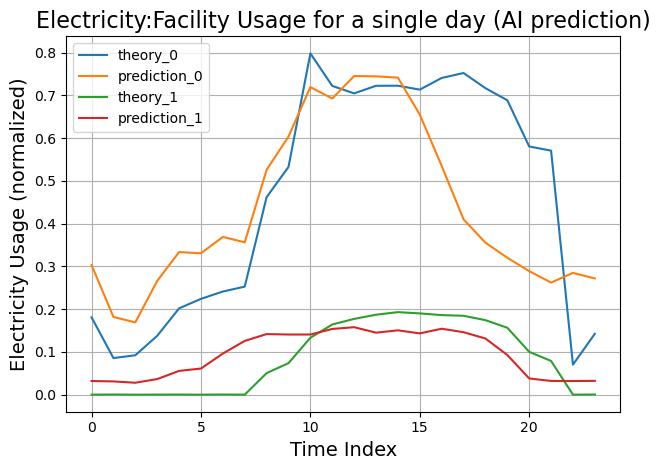

In [416]:
plt.plot(labels[0][0].cpu(), label = "theory_0")
plt.plot(outputs[0][0].detach().cpu(), label = "prediction_0")
plt.plot(labels[1][0].cpu(), label = "theory_1")
plt.plot(outputs[1][0].detach().cpu(), label = "prediction_1")
plt.title("Electricity:Facility Usage for a single day (AI prediction)", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Electricity Usage (normalized)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [385]:
inputs.shape

torch.Size([2, 3, 24])

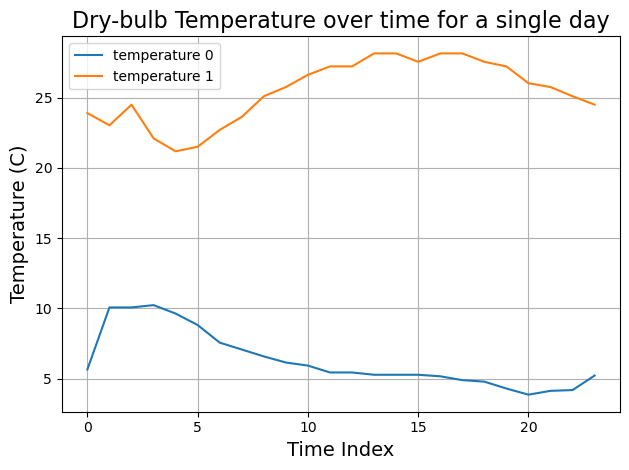

In [418]:
plt.plot((inputs * ((x_maxes - x_mins) + x_mins))[0,0,:].detach().cpu(), label = "temperature 0")
plt.plot((inputs * ((x_maxes - x_mins) + x_mins))[1,0,:].detach().cpu(), label = "temperature 1")

plt.title("Dry-bulb Temperature over time for a single day", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

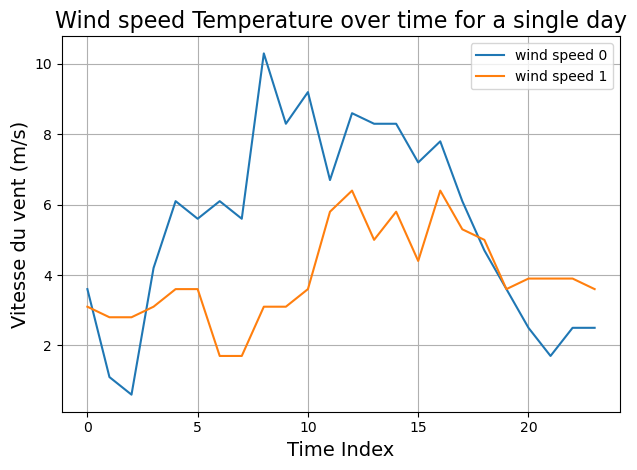

In [469]:
plt.plot((inputs * ((x_maxes - x_mins) + x_mins))[0,1,:].detach().cpu(), label = "wind speed 0")
plt.plot((inputs * ((x_maxes - x_mins) + x_mins))[1,1,:].detach().cpu(), label = "wind speed 1")

plt.title("Wind speed Temperature over time for a single day", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Vitesse du vent (m/s)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## comparing the results on another climate set

In [451]:
new_file_path = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\run_2\\run\\eplusout.sql"  # Replace with your actual file path
new_data_electricity,wdf,wef = generate_tensors(db_path)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\3362226395.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_day["norm_hours"] = (week_day.index/6)%24
C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\3362226395.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_end["norm_hours"] = (week_end.index/6)%24


In [456]:
new_weather_path = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\run_2\\CAN_AB_Calgary.718770_CWEC.epw"
new_weather_data = import_weather_data(wdf, epw_file_path)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\3176193910.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_w_data["TimeIndex"] = (important_w_data.index + 1)*6
C:\Users\xuebi\AppData\Local\Temp\ipykernel_31740\3176193910.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_day_weather["norm_hours"] = (week_day_weather.index/6)%24


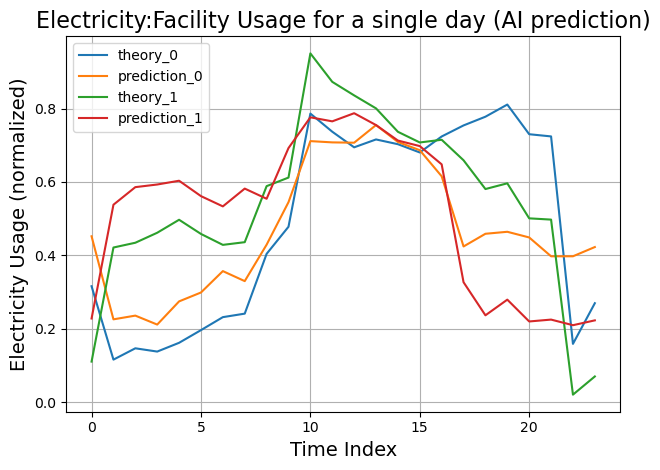

In [468]:
new_inputs = new_weather_data[10:30:10,:,:].to(DEVICE)
new_predictions = model(new_weather_data[10:30:10,:,:].to(DEVICE))
new_labels = new_data_electricity[10:30:10,:,:]
plt.plot(new_labels[0][0].cpu(), label = "theory_0")
plt.plot(new_predictions[0][0].detach().cpu(), label = "prediction_0")
plt.plot(new_labels[1][0].cpu(), label = "theory_1")
plt.plot(new_predictions[1][0].detach().cpu(), label = "prediction_1")
plt.title("Electricity:Facility Usage for a single day (AI prediction)", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Electricity Usage (normalized)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Distribution of models

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np 
import seaborn as sns
from shapely.geometry import Point


# Load the dataset for Canadian provinces (replace with the path to your downloaded shapefile)
shapefile_path = 'C:/Users/xuebi/Downloads/lcd_000b16a_e/lcd_000b16a_e.shp'
canada_provinces = gpd.read_file(shapefile_path)

C:\Users\xuebi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### importer les donnes de la geometrie des zones

In [2]:
# shapefile_path = 'C:/Users/xuebi/Downloads/lcd_000b16a_e/lcd_000b16a_e.shx'
# canada_provincesD = gpd.read_file(shapefile_path)
# print(canada_provincesD)
# # Filter for Quebec (using the ISO code or province name)

quebec = canada_provinces[canada_provinces['CDUID'] == '2401']
# print(quebec["CDNAME"])
quebec_full = canada_provinces[canada_provinces['PRNAME'] == 'Quebec / Québec']
# print(quebec[quebec['CDUID'] == '2499'])
# multi_poly = quebec.loc[4,"geometry"]

# if isinstance(multi_poly, MultiPolygon):
#     # Iterate over the individual Polygons in the MultiPolygon
#     i = 0
#     for poly in multi_poly.geoms:
#         print(i)  # Each `poly` is a Polygon object
#         i +=1
# for geom in multi_poly.geoms:
#     plt.plot(*geom.exterior.xy)
#     break        

# # Plot the map of Quebec
# fig, ax = plt.subplots(figsize=(10, 10))
# quebec.plot(ax=ax, color='lightblue', edgecolor='black')
# # Add title and remove axes
# ax.set_title('Map of Quebec', fontsize=15)
# ax.set_axis_off()
# plt.show()

"""
df = pd.read_csv('./data_extraction/canada_residency_data.csv')
df = df.drop("COORDONNÉES", axis = 1)
data_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"]) & ("Total - Type de construction résidentielle"!=df["Type de construction résidentielle (9)"])]
geom_data = data_menage_region["DGUID"]
"""

'\ndf = pd.read_csv(\'./data_extraction/canada_residency_data.csv\')\ndf = df.drop("COORDONNÉES", axis = 1)\ndata_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"]) & ("Total - Type de construction résidentielle"!=df["Type de construction résidentielle (9)"])]\ngeom_data = data_menage_region["DGUID"]\n'

In [3]:
quebec_full_WGS = quebec_full.to_crs(epsg=4326)
quebec_full_WGS["Zone"] = 0
for index, row in quebec_full_WGS.iterrows():
    differenec_coords = [51.0,0]-np.array(row.geometry.centroid.coords[0])[::-1]
    if differenec_coords[0] > 0:
        quebec_full_WGS.at[index, "Zone"] = 1
    else:
        pass
    

### importer les donnees climatiques

In [4]:
weather_station_files = "D:\\PI4_main\\CWEEDS_2020_stns_all_REV_20210324.csv"
# Read CSV file into a DataFrame
df = pd.read_csv(weather_station_files)

# Display the first few rows of the DataFrame
print(df.head())

      version           name prov country climate_ID    lat     lon  \
0  CWEEDS2011      ABEE AGDM   AB     CAN    3010010  54.28 -112.97   
1  CWEEDS2011    ANDREW AGDM   AB     CAN    3010237  53.92 -112.28   
2  CWEEDS2011    ATMORE AGDM   AB     CAN    3060406  54.78 -112.82   
3  CWEEDS2011       BANFF CS   AB     CAN    3050519  51.19 -115.55   
4  CWEEDS2011  BARNWELL AGDM   AB     CAN    3030525  49.80 -112.30   

   UTC_offset  elev(m)  first_yr  last_yr  
0          -7    664.0      2003     2017  
1          -7    625.0      2003     2017  
2          -7    574.0      2003     2017  
3          -7   1396.9      1998     2017  
4          -7    824.2      2003     2017  


In [5]:
quebec_stations_reference = df[df["prov"] == "QC"]

In [6]:
quebec_stations_reference

,version,name,prov,country,climate_ID,lat,lon,UTC_offset,elev(m),first_yr,last_yr
425,CWEEDS2011,AMQUI,QC,CAN,7050145,48.47,-67.43,-5,166.0,1998,2017
426,CWEEDS2011,BAGOTVILLE A,QC,CAN,7060400,48.33,-71.00,-5,159.1,1998,2017
427,CWEEDS2011,BAIE-COMEAU A,QC,CAN,7040442,49.13,-68.20,-5,21.6,1998,2017
428,CWEEDS2011,BAIE-COMEAU,QC,CAN,704S001,49.26,-68.15,-5,129.5,1998,2017
429,CWEEDS2011,BARRAGE TEMISCAMINGUE,QC,CAN,7080468,46.71,-79.10,-5,181.4,1998,2017
...,...,...,...,...,...,...,...,...,...,...,...
501,CWEEDS2011,STE-ANNE-DE-BELLEVUE 1,QC,CAN,702FHL8,45.43,-73.93,-5,39.0,1998,2017
502,CWEEDS2011,STE-CLOTHILDE,QC,CAN,7027039,45.17,-73.68,-5,53.0,1998,2017
503,CWEEDS2011,STE-FOY (U. LAVAL),QC,CAN,701Q004,46.78,-71.29,-5,91.4,1998,2017
504,CWEEDS2011,VAL-D'OR,QC,CAN,7098603,48.06,-77.79,-5,338.9,1998,2017


Text(0.5, 1.0, 'Appartement ou plain-pied dans un duplex')

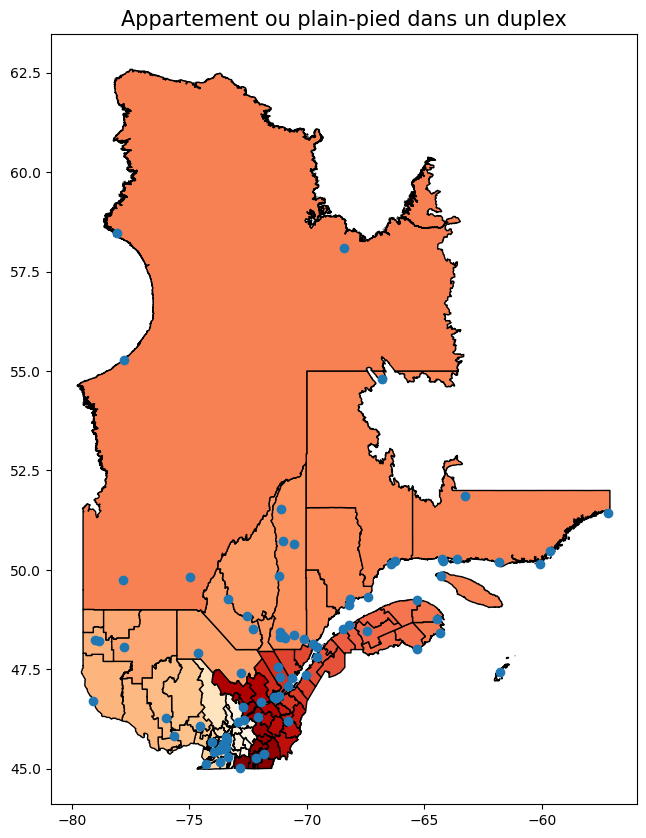

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
quebec_full_WGS.plot(ax=ax, cmap='OrRd',scheme='percentiles', edgecolor='black',legend=True)
# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.scatter(coors_stations["lon"], coors_stations["lat"])
ax.set_title('Appartement ou plain-pied dans un duplex', fontsize=15)


# ax.set_axis_off()
# plt.show()



Text(0.5, 1.0, 'ZONE DE DÉMARQUATION')

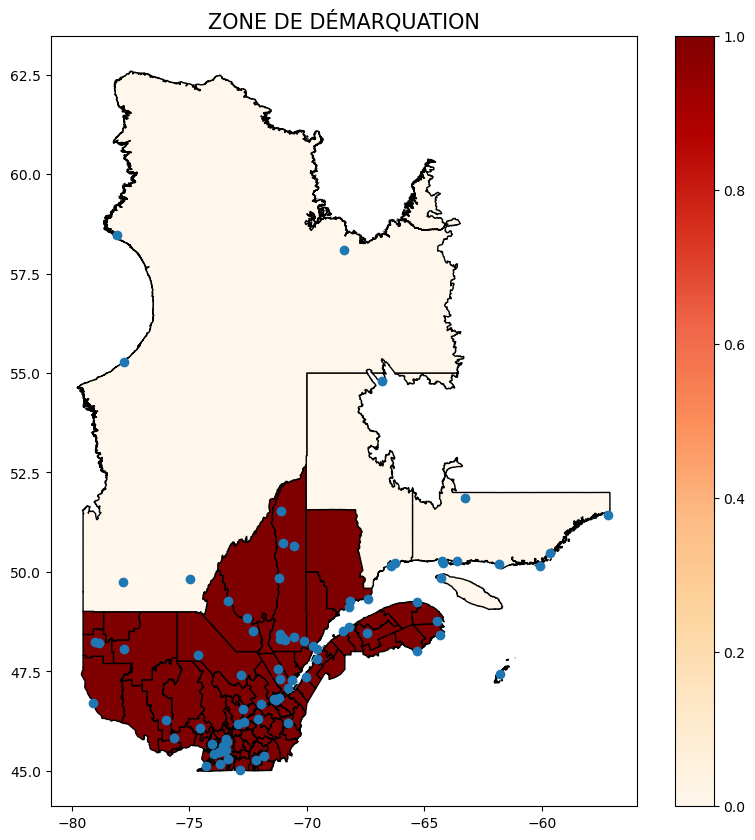

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
quebec_full_WGS.plot(column = "Zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.scatter(coors_stations["lon"], coors_stations["lat"])
ax.set_title('ZONE DE DÉMARQUATION', fontsize=15)


# ax.set_axis_off()
# plt.show()



In [9]:
quebec_full_WGS

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1
...,...,...,...,...,...,...,...
206,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",1
207,2443,Sherbrooke,TÉ,24,Quebec / Québec,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",1
208,2444,Coaticook,MRC,24,Quebec / Québec,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",1
209,2445,Memphrémagog,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",1


## I need population data to find the more important MRCS...

In [10]:
shapefile_path = "D:\\PI4_main\\lcd_000b21a_e\\lcd_000b21a_e.shp"
canada_provinces = gpd.read_file(shapefile_path)
new_21_quebec = canada_provinces[canada_provinces["PRUID"] == "24"]

In [11]:
pop_data = pd.read_csv('D:\\PI4_main\\data_extraction\\population_data_QC.csv')
pop_data["CDUID"] = 0

In [12]:
for index, row in pop_data.iterrows():
    pop_data.at[index,"CDUID"] = new_21_quebec[new_21_quebec["CDNAME"] == row["Geographic name"]]["CDUID"]._values[0]

C:\Users\xuebi\AppData\Local\Temp\ipykernel_3100\1437308863.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2488' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pop_data.at[index,"CDUID"] = new_21_quebec[new_21_quebec["CDNAME"] == row["Geographic name"]]["CDUID"]._values[0]


In [13]:
pop_data["Population"] = pop_data["Population"].str.replace(',', '').astype(int)
pop_data.sort_values(by = "Population", inplace =True)

In [14]:
N = 5
quebec_full_WGS[quebec_full_WGS["CDUID"].isin(pop_data.nlargest(N, columns="Population")["CDUID"])]

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone
68,2458,Longueuil,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.43881 45.65185, -73.4352 4...",1
75,2465,Laval,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.53145 45.69599, -73.53221 ...",1
76,2466,Montréal,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.47668 45.70214, -73.47722 ...",1
91,2481,Gatineau,TÉ,24,Quebec / Québec,"POLYGON ((-75.35508 45.59611, -75.3531 45.5861...",1
188,2423,Québec,TÉ,24,Quebec / Québec,"POLYGON ((-71.1726 46.90513, -71.17218 46.9044...",1


In [15]:
pop_data.nlargest(N, columns="Population")["CDUID"]

76    2466
84    2423
44    2465
63    2458
21    2481
Name: CDUID, dtype: object

In [16]:
quebec_full_WGS.loc[quebec_full_WGS["CDUID"].isin(pop_data.nlargest(N, columns="Population")["CDUID"]),["Zone"]] = [2,3,4,5,6]

In [17]:
quebec_full_WGS[quebec_full_WGS["CDUID"].isin(pop_data.nlargest(N, columns="Population")["CDUID"])]

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone
68,2458,Longueuil,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.43881 45.65185, -73.4352 4...",2
75,2465,Laval,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.53145 45.69599, -73.53221 ...",3
76,2466,Montréal,TÉ,24,Quebec / Québec,"MULTIPOLYGON (((-73.47668 45.70214, -73.47722 ...",4
91,2481,Gatineau,TÉ,24,Quebec / Québec,"POLYGON ((-75.35508 45.59611, -75.3531 45.5861...",5
188,2423,Québec,TÉ,24,Quebec / Québec,"POLYGON ((-71.1726 46.90513, -71.17218 46.9044...",6


In [27]:
quebec_full_WGS

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1
...,...,...,...,...,...,...,...
206,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",1
207,2443,Sherbrooke,TÉ,24,Quebec / Québec,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",1
208,2444,Coaticook,MRC,24,Quebec / Québec,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",1
209,2445,Memphrémagog,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",1


In [18]:
grouped = quebec_full_WGS.dissolve(by='Zone')
grouped = grouped.reset_index()

Text(0.5, 1.0, 'ZONE DE DÉMARQUATION')

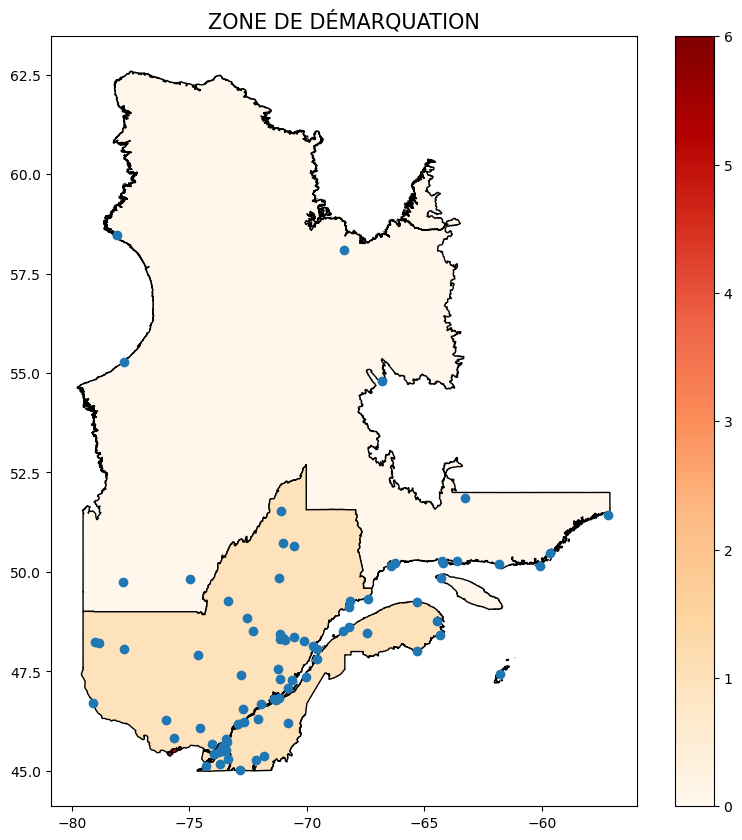

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
grouped.plot(column = "Zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.scatter(coors_stations["lon"], coors_stations["lat"])
ax.set_title('ZONE DE DÉMARQUATION', fontsize=15)


# ax.set_axis_off()
# plt.show()



Text(0.5, 1.0, 'ZONE DE DÉMARQUATION des MRC les plus peuplés')

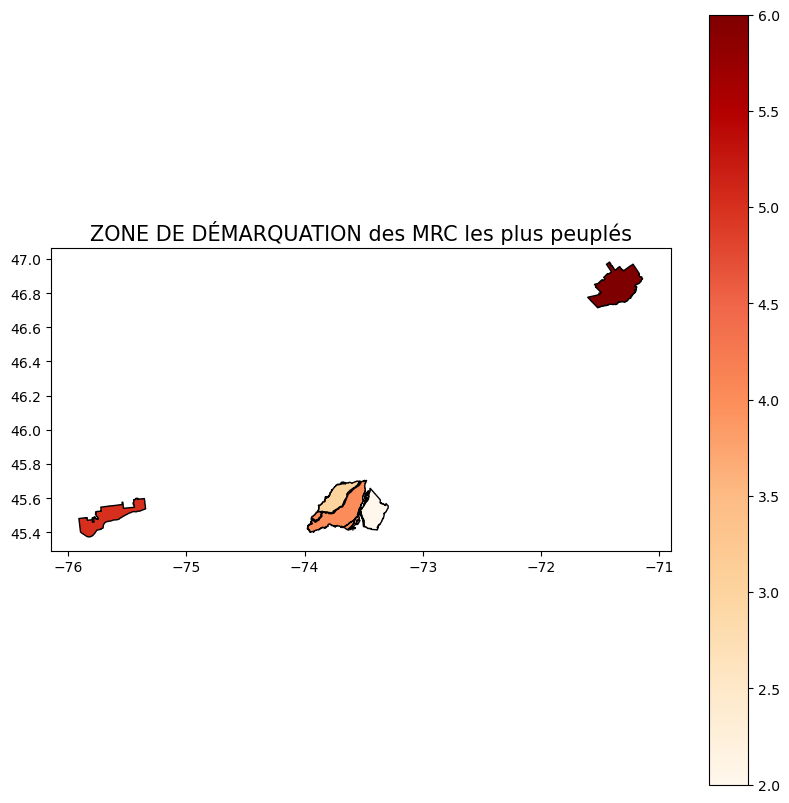

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
grouped[grouped["Zone"].isin([2,3,4,5,6])].plot(column = "Zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
ax.set_title('ZONE DE DÉMARQUATION des MRC les plus peuplés', fontsize=15)


# ax.set_axis_off()
# plt.show()



In [21]:
grouped["weather_index"] =0 

## trouver les stations meteos les plus proches du centre

In [22]:
for index, row in grouped.iterrows():
    differenec_coords = coors_stations-np.array(row.geometry.centroid.coords[0])[::-1]
    distances_array = differenec_coords["lat"]**2 + differenec_coords["lon"]**2
    distances_array = distances_array.sort_values()
    minmum_index = distances_array.iloc[:1].index
    grouped.at[index, "weather_index"] = minmum_index

In [23]:
grouped["weather_index"]

0    462
1    493
2    479
3    477
4    477
5    448
6    491
Name: weather_index, dtype: int64

In [25]:
coor_filter = coors_stations.loc[grouped["weather_index"]]

In [26]:
coor_filter

,lat,lon
462,51.53,-71.11
493,48.52,-72.27
479,45.52,-73.42
477,45.47,-73.74
477,45.47,-73.74
448,45.84,-75.65
491,46.80,-71.38


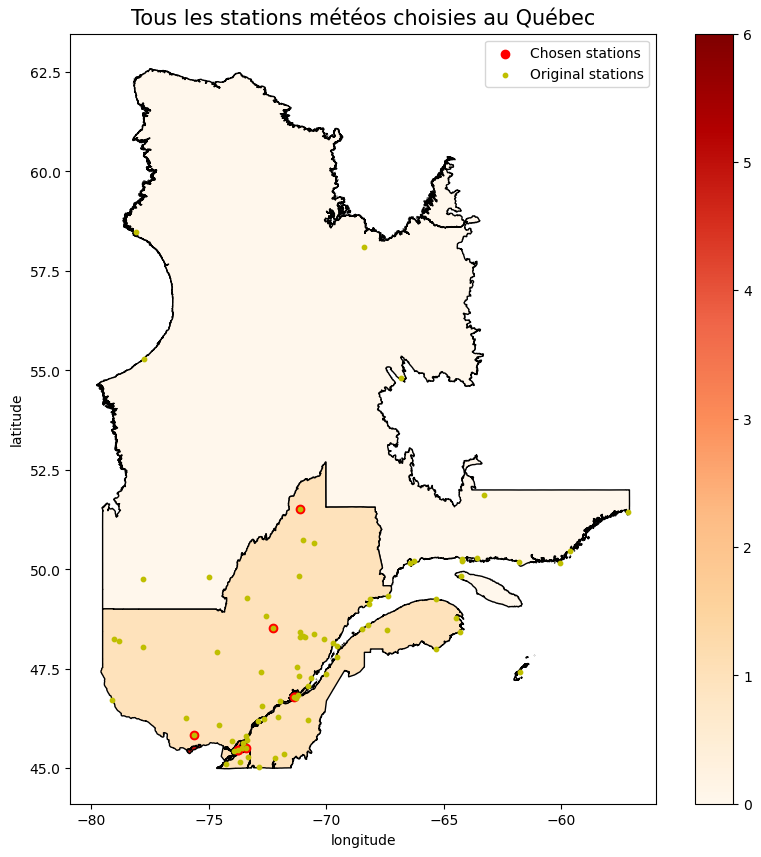

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
# quebec_full_WGS.plot(column = "Appartement ou plain-pied dans un duplex", ax=ax, cmap='OrRd',scheme='percentiles', edgecolor='black',legend=True)
grouped.plot(column = "Zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.scatter(coor_filter["lon"], coor_filter["lat"], color = "r", label = "Chosen stations")
ax.scatter(coors_stations["lon"], coors_stations["lat"], s = 10, color = "y", label = "Original stations")

ax.set_title('Tous les stations météos choisies au Québec', fontsize=15)
ax.legend()
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# ax.set_axis_off()
plt.show()



In [30]:
coor_filter_small = coors_stations.loc[grouped[grouped["Zone"].isin([2,3,4,5,6])]["weather_index"]]

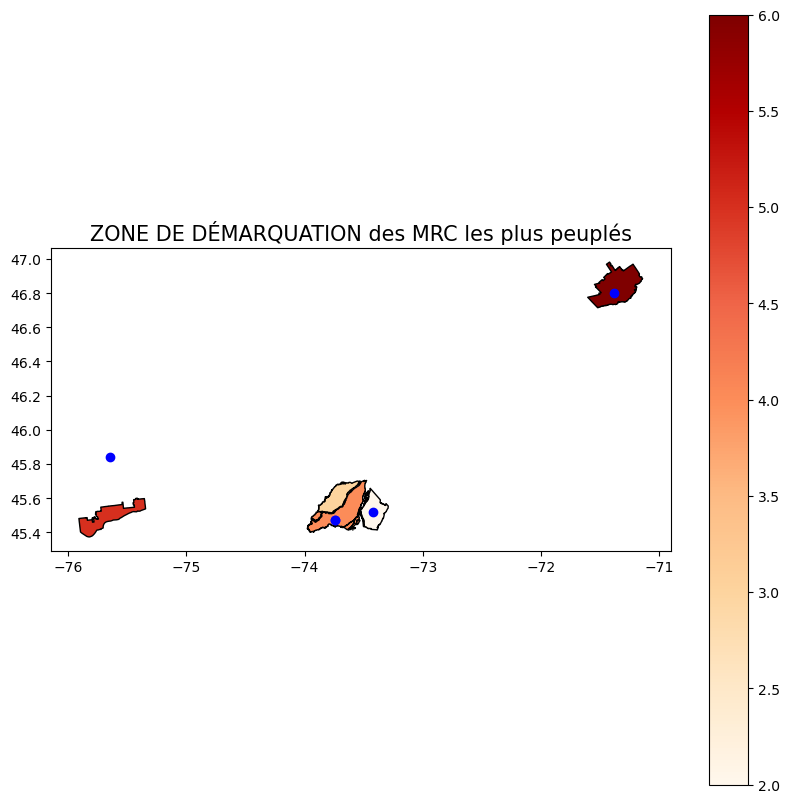

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
grouped[grouped["Zone"].isin([2,3,4,5,6])].plot(column = "Zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
ax.set_title('ZONE DE DÉMARQUATION des MRC les plus peuplés', fontsize=15)

ax.scatter(coor_filter_small["lon"], coor_filter_small["lat"], color = "b", label = "Chosen stations")

# ax.set_axis_off()
# plt.show()



In [70]:
coor_filter

,lat,lon
462,51.53,-71.11
493,48.52,-72.27
479,45.52,-73.42
477,45.47,-73.74
477,45.47,-73.74
448,45.84,-75.65
491,46.80,-71.38


In [61]:
quebec_full_WGS[quebec_full_WGS["weather_zone"] == 479]

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone,weather_zone
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1,479
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1,479
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1,479
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1,479
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1,479
62,2452,D'Autray,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-73.30729 46.48019, -73.25316 ...",1,479
63,2453,Pierre-De Saurel,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.94024 46.09515, -72.94017 ...",1,479
64,2454,Les Maskoutains,MRC,24,Quebec / Québec,"POLYGON ((-72.83216 45.84971, -72.81838 45.840...",1,479
65,2455,Rouville,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.82013 45.45663, -72.82072 ...",1,479
66,2456,Le Haut-Richelieu,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-73.03269 45.37704, -73.03256 ...",1,479


In [65]:
for index, row in quebec_full_WGS.iterrows():
    differenec_coords = coor_filter-np.array(row.geometry.centroid.coords[0])[::-1]
    distances_array = differenec_coords["lat"]**2 + differenec_coords["lon"]**2
    distances_array = distances_array.sort_values()
    minmum_index = distances_array.iloc[:1].index
    quebec_full_WGS.at[index, "weather_zone"] = minmum_index

In [66]:
new_grouped = quebec_full_WGS.dissolve(by='weather_zone')
new_grouped = new_grouped.reset_index()

In [82]:
new_grouped.loc[new_grouped["weather_zone"] == 493,["weather_zone"]] = 462

In [83]:
new_grouped

,weather_zone,geometry,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Zone
0,448,"POLYGON ((-76.29644 45.46445, -76.31704 45.457...",2479,Antoine-Labelle,MRC,24,Quebec / Québec,1
1,462,"MULTIPOLYGON (((-79.50622 51.56252, -79.50585 ...",2494,Le Saguenay-et-son-Fjord,CDR,24,Quebec / Québec,1
2,477,"MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ...",2462,Matawinie,MRC,24,Quebec / Québec,1
3,479,"MULTIPOLYGON (((-73.49823 45.43278, -73.49826 ...",2447,La Haute-Yamaska,MRC,24,Quebec / Québec,1
4,491,"MULTIPOLYGON (((-71.41508 45.23621, -71.4177 4...",2401,Les Îles-de-la-Madeleine,TÉ,24,Quebec / Québec,1
5,462,"MULTIPOLYGON (((-74.44445 48.95926, -74.44075 ...",2490,La Tuque,TÉ,24,Quebec / Québec,1


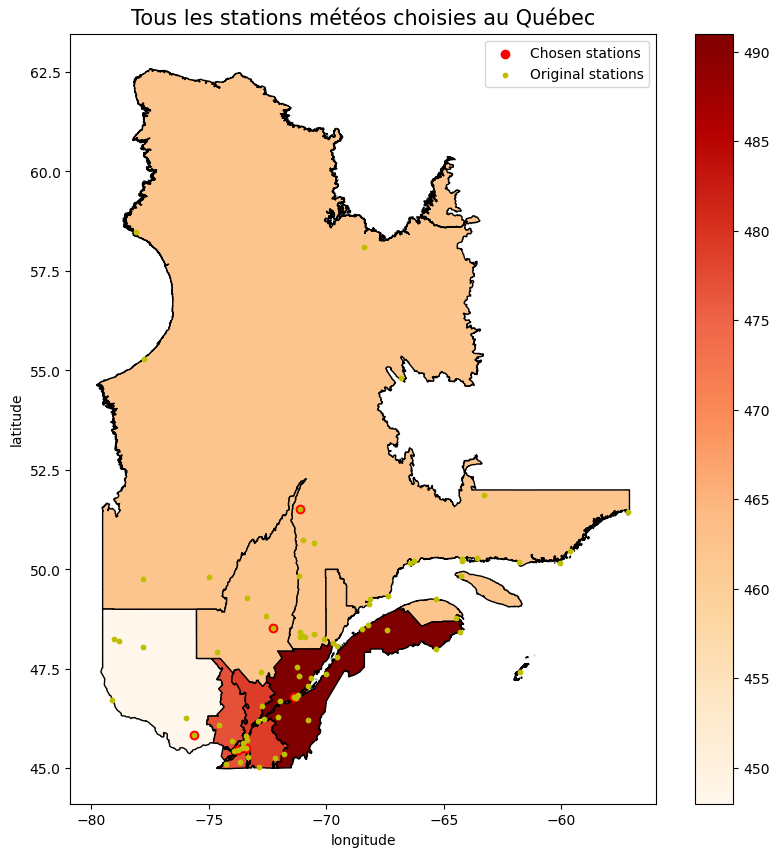

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
# quebec_full_WGS.plot(column = "Appartement ou plain-pied dans un duplex", ax=ax, cmap='OrRd',scheme='percentiles', edgecolor='black',legend=True)
new_grouped.plot(column = "weather_zone", ax=ax, cmap='OrRd', edgecolor='black',legend=True)# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.scatter(coor_filter["lon"], coor_filter["lat"], color = "r", label = "Chosen stations")
ax.scatter(coors_stations["lon"], coors_stations["lat"], s = 10, color = "y", label = "Original stations")

ax.set_title('Tous les stations météos choisies au Québec', fontsize=15)
ax.legend()
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# ax.set_axis_off()
plt.show()



In [69]:
quebec_full_WGS

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone,weather_zone
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1,479
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1,479
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1,479
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1,479
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1,479
...,...,...,...,...,...,...,...,...
206,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",1,479
207,2443,Sherbrooke,TÉ,24,Quebec / Québec,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",1,479
208,2444,Coaticook,MRC,24,Quebec / Québec,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",1,491
209,2445,Memphrémagog,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",1,479


In [27]:
id_strings = np.array(quebec_stations_reference.loc[coor_filter.index]["climate_ID"])

## importer les donees des stations meteos selectionnes a l'etape precedente

In [28]:
import os

folder = "D:\\PI4_main\\CWEC_2020_QC"
filenames = os.listdir(folder)

In [29]:
weather_file_paths = []
for elements in filenames:
    mini_array = elements.split("_")
    if any(elem in id_strings for elem in mini_array):
        weather_file_paths.append("_".join(mini_array))

In [30]:
weather_file_paths

['CAN_QC_HIGH-FALLS_7033121_CWEC.epw',
 'CAN_QC_LAC-BENOIT_706I001_CWEC.epw',
 'CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw',
 'CAN_QC_MONTREAL-ST-HUBERT_7027329_CWEC.epw',
 'CAN_QC_QUEBEC-INTL-A_7016293_CWEC.epw',
 'CAN_QC_ROBERVAL-A_7066686_CWEC.epw']

### ecrire des fichier de workflow custom for chaque fichier meteo

In [42]:
# Open the file in read mode
import shutil
def write_workflow(weather_file, seed_file):
    array_of_strings = []
    path_to_workflow = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\worflow.osw"
    with open(path_to_workflow, "r") as file:
        for line in file:
            if '  "weather_file"' in line.split(":"):
                array_of_strings.append(":".join([line.split(":")[0], f' "D:\\\\PI4_main\\\\CWEC_2020_QC\\\\{weather_file}",\n']))

            elif '  "seed_file"' in line.split(":"):
                array_of_strings.append(":".join([line.split(":")[0], f'"archtype.osm",\n']))
            else:
                array_of_strings.append(line)
    dir_path = f"D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\{weather_file[:-25]}_{seed_file[:-20]}"
    os.makedirs(dir_path, exist_ok=True)
    shutil.copy(f"D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\{seed_file}", f"{dir_path}\\archtype.osm")
    path_writing = f"D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\{weather_file[:-25]}_{seed_file[:-20]}\\worflow.osw"
    with open(path_writing, "w") as file:
        # Write each string to the file on a new line
        file.writelines(array_of_strings)  # Add a newline character
    return f"{weather_file[:-25]}_{seed_file[:-20]}"

In [50]:
workflow_path = write_workflow('CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw', "1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_resistance_change.osm")

In [662]:
path_writing = "D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\run_2\\worflow3.osw"
with open(path_writing, "w") as file:
    # Write each string to the file on a new line
    file.writelines(array_of_strings)  # Add a newline character

### fonction pour appeller openstudio et resoudre

In [47]:
import subprocess
def solve(folder_name):
    # Path to the executable file
    software_path = "D:\\openstudio-3.7.0\\bin\\openstudio.exe"

    # Arguments for the software
    arguments = [
        "run",
        "--workflow",
        f"D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\{folder_name}\\\\worflow.osw",
    ]
    print(arguments)
    # Run the software with arguments
    result = subprocess.run([software_path] + arguments, capture_output=True, text=True, shell=True)
    return result

### resolution des problemes pour larchetype 1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_resistance_change avec les fichiers meteos choisies

In [52]:
archetype_file = "1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_resistance_change.osm"
for elements in weather_file_paths:
    workflow_path = write_workflow(elements,  archetype_file)
    print(solve(workflow_path))
    print(f"Sovled achetype {archetype_file}  for weather {elements}")

['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\\\worflow.osw']
CompletedProcess(args=['D:\\openstudio-3.7.0\\bin\\openstudio.exe', 'run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\\\worflow.osw'], returncode=0, stdout='ExpandObjects Started.\nNo expanded file generated.\nExpandObjects Finished. Time:     0.016\nRunEnergyPlus: Completed Successfully with \x1b0 Fatal Errors, \x1b\x1b0 Severe Errors, \x1b\x1b66 Warnings.\x1b\n', stderr='')
Sovled achetype 1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_resistance_change.osm  for weather CAN_QC_HIGH-FALLS_7033121_CWEC.epw
['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_LA_

### resolution des problemes pour larchetype 4950d56f-f622-4353-9b10-7a58344003eschedule_change_resistance_change avec les fichiers meteos choisies

In [53]:
archetype_file = "4950d56f-f622-4353-9b10-7a58344003eschedule_change_resistance_change.osm"
for elements in weather_file_paths:
    workflow_path = write_workflow(elements,  archetype_file)
    print(solve(workflow_path))
    print(f"Sovled achetype {archetype_file}  for weather {elements}")

['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_4950d56f-f622-4353-9b10-7a58344003eschedule_change_r\\\\worflow.osw']
CompletedProcess(args=['D:\\openstudio-3.7.0\\bin\\openstudio.exe', 'run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_4950d56f-f622-4353-9b10-7a58344003eschedule_change_r\\\\worflow.osw'], returncode=0, stdout='ExpandObjects Started.\nNo expanded file generated.\nExpandObjects Finished. Time:     0.016\nRunEnergyPlus: Completed Successfully with \x1b0 Fatal Errors, \x1b\x1b0 Severe Errors, \x1b\x1b66 Warnings.\x1b\n', stderr='')
Sovled achetype 4950d56f-f622-4353-9b10-7a58344003eschedule_change_resistance_change.osm  for weather CAN_QC_HIGH-FALLS_7033121_CWEC.epw
['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_LA_

In [54]:
archetype_file = "8599ccf2-899f-48da-aa7b-fabac2b06baschedule_change_resistance_change.osm"
for elements in weather_file_paths:
    workflow_path = write_workflow(elements,  archetype_file)
    print(solve(workflow_path))
    print(f"Sovled achetype {archetype_file}  for weather {elements}")

['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_8599ccf2-899f-48da-aa7b-fabac2b06baschedule_change_r\\\\worflow.osw']
CompletedProcess(args=['D:\\openstudio-3.7.0\\bin\\openstudio.exe', 'run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_HI_8599ccf2-899f-48da-aa7b-fabac2b06baschedule_change_r\\\\worflow.osw'], returncode=0, stdout='ExpandObjects Started.\nNo expanded file generated.\nExpandObjects Finished. Time:     0.016\nRunEnergyPlus: Completed Successfully with \x1b0 Fatal Errors, \x1b\x1b0 Severe Errors, \x1b\x1b66 Warnings.\x1b\n', stderr='')
Sovled achetype 8599ccf2-899f-48da-aa7b-fabac2b06baschedule_change_resistance_change.osm  for weather CAN_QC_HIGH-FALLS_7033121_CWEC.epw
['run', '--workflow', 'D:\\\\PI4_main\\\\ARCH_etablissements_alimentaires\\\\commerce_basic_generation\\\\results\\\\in.osm\\\\CAN_QC_LA_

## distrubution de la vente en gros

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


# Load XML file into a pandas DataFrame
df = pd.read_xml('D:\Roles_Donnees_Ouvertes_2024\RL66023_2024.xml')  # Replace 'your_file.xml' with the path to your XML file

# Display the DataFrame

In [79]:
df["RLM01A"] = "66023"

In [80]:
df

,VERSION,RLM01A,RLM02A,RL0101,RL0102A,RL0104,RL0105A,RL0106A,RL0107A,RL0201,...,RL0501A,RL0502A,RL0309A,RL0310A,RL0504,RL0312A,RL0304A,RL0507,RL0305A,RL0314A
0,2.7,66023,NaN,None,None,None,NaN,None,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
1,NaN,66023,NaN,None,None,None,NaN,None,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
2,NaN,66023,2023.0,None,None,None,NaN,None,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
3,NaN,66023,NaN,\n,REM19,\n,1000.0,30-F14000200,2038.0,\n,...,0.0,06,NaN,NaN,None,NaN,NaN,None,NaN,NaN
4,NaN,66023,NaN,\n,REM19,\n,6000.0,30-F17000600,2078.0,\n,...,0.0,10,NaN,NaN,None,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429619,NaN,66023,NaN,\n,REM23,\n,9100.0,30-F72525671,6597.0,\n,...,1.0,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
429620,NaN,66023,NaN,\n,REM22,\n,9100.0,30-F35130001,2800.0,\n,...,1.0,None,NaN,NaN,\n,NaN,NaN,None,NaN,NaN
429621,NaN,66023,NaN,\n,REM34,\n,9100.0,30-F44496999,3477.0,\n,...,1.0,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
429622,NaN,66023,NaN,\n,REM19,\n,5999.0,30-F26047583,2289.0,\n,...,0.0,10,NaN,NaN,None,NaN,NaN,None,NaN,NaN


In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np 
import seaborn as sns
from shapely.geometry import Point
municiaplity_data = pd.read_csv("MUN.csv")
municiaplity_data["mcode"] = municiaplity_data["mcode"].astype(str)
top_quebec = municiaplity_data.sort_values(by='mpopul', ascending=False)[:100]

In [81]:
for index, row in top_quebec.iterrows():
    munid = row["mcode"]
    if munid == "66023":
        pass
    else:
        print(munid)
        new_df = pd.read_xml(f'D:\Roles_Donnees_Ouvertes_2024\RL{"0" * (5-len(munid))}{munid}_2024.xml')  # Replace 'your_file.xml' with the path to your XML file
        new_df["RLM01A"] = munid
        df = pd.concat([df,new_df])


23027
65005
81017
58227
43027
25213
94068
37067
64008
56083
58007
60013
49058
75017
47017
74005
73015
54048
64015
67050
36033
66142
10043
39062
72005
71083
70052
86042
58033
66058
53052
66097
29073
89008
57005
67035
93042
59010
73005
45072
67015
73010
31084
58037
63048
57040
97007
60028
67020
58012
71105
61025
66072
59020
72015
96020
23072
12072
66087
66032
66102
57035
66107
75028
75005
72010
67030
23057
57020
46080
61035
73035
52007
67045
3005
71070
76020
77022
70022
79088
38010
8053
73020
82015
75040
59015
92022
26030
88055
1023
57010
62037
82020
63060
77043
46078
55048
78032
71065


In [82]:
df['RL0105A'] = df['RL0105A'].astype(str)
superficie_BC = df[(df['RL0105A'].str.startswith('51')) & (df['RL0308A'] != "NaN")]

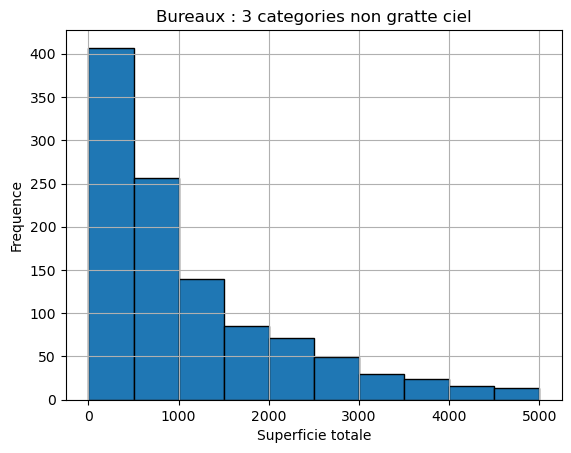

In [83]:
superficie_BC['RL0308A'].hist(bins=10, range = (0,5000), edgecolor='black')
plt.title('Bureaux : 3 categories non gratte ciel')  # Set the title of the histogram
plt.xlabel('Superficie totale')  # Optionally, add x-axis label
plt.ylabel('Frequence')  # Optionally, add y-axis label
plt.show()

In [84]:
q1 = superficie_BC['RL0308A'].quantile(0.25)  # 25th percentile
q2 = superficie_BC['RL0308A'].quantile(0.50)  # 25th percentile
q3 = superficie_BC['RL0308A'].quantile(0.75)  # 25th percentile

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / Median):", q2)
print("Q2 (75th percentile):", q3)
print("Mean:", superficie_BC['RL0308A'].mean())


Q1 (25th percentile): 367.375
Q2 (50th percentile / Median): 851.75
Q2 (75th percentile): 1989.425
Mean: 1769.6775803722508


In [85]:
superficie_BC["RL0308A"]

38       1355.6
14463     338.6
15294     121.2
15296       NaN
22262    2493.0
          ...  
3082        NaN
1429      111.6
4903      664.1
286       287.2
304       323.4
Name: RL0308A, Length: 1490, dtype: float64

In [86]:
superficie_BC = df[(df['RL0105A'].str.startswith('51'))]

In [99]:
superficie_BC[superficie_BC["RLM01A"].str.startswith("66")].shape[0]

170

In [113]:
quebec_full_WGS

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone,Vente en gros
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1,13
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1,0
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1,29
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1,0
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1,0
...,...,...,...,...,...,...,...,...
206,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",1,0
207,2443,Sherbrooke,TÉ,24,Quebec / Québec,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",1,45
208,2444,Coaticook,MRC,24,Quebec / Québec,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",1,0
209,2445,Memphrémagog,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",1,4


In [112]:
for index, row in quebec_full_WGS.iterrows():
    mrc_id = row["CDUID"][-2:]
    quebec_full_WGS.at[index, "Vente en gros"] = superficie_BC[superficie_BC["RLM01A"].str.startswith(f"{mrc_id}")].shape[0]
    print(f"MRC :{mrc_id} - count : {count}")

MRC :47 - count : 8
MRC :48 - count : 8
MRC :49 - count : 8
MRC :50 - count : 8
MRC :51 - count : 8
MRC :52 - count : 8
MRC :53 - count : 8
MRC :54 - count : 8
MRC :55 - count : 8
MRC :56 - count : 8
MRC :57 - count : 8
MRC :58 - count : 8
MRC :59 - count : 8
MRC :60 - count : 8
MRC :61 - count : 8
MRC :62 - count : 8
MRC :63 - count : 8
MRC :64 - count : 8
MRC :65 - count : 8
MRC :66 - count : 8
MRC :67 - count : 8
MRC :68 - count : 8
MRC :69 - count : 8
MRC :70 - count : 8
MRC :71 - count : 8
MRC :72 - count : 8
MRC :73 - count : 8
MRC :74 - count : 8
MRC :75 - count : 8
MRC :76 - count : 8
MRC :77 - count : 8
MRC :78 - count : 8
MRC :79 - count : 8
MRC :80 - count : 8
MRC :81 - count : 8
MRC :82 - count : 8
MRC :83 - count : 8
MRC :84 - count : 8
MRC :85 - count : 8
MRC :86 - count : 8
MRC :87 - count : 8
MRC :88 - count : 8
MRC :89 - count : 8
MRC :90 - count : 8
MRC :91 - count : 8
MRC :92 - count : 8
MRC :93 - count : 8
MRC :94 - count : 8
MRC :95 - count : 8
MRC :96 - count : 8


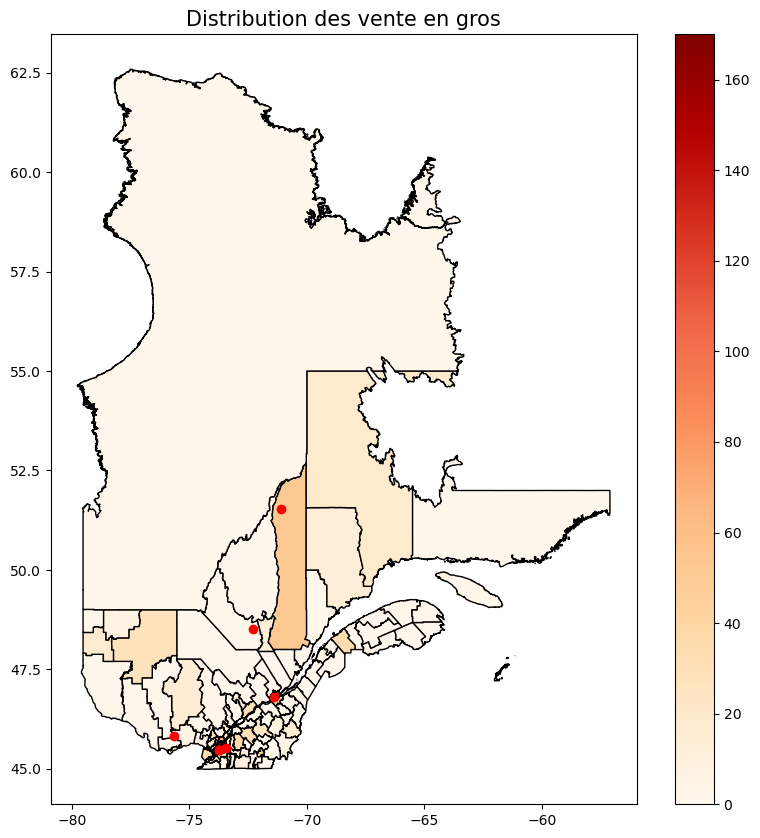

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))
quebec_full_WGS.plot(column = "Vente en gros", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.set_title('Distribution des vente en gros', fontsize=15)
ax.scatter(coor_filter["lon"], coor_filter["lat"], color = "r", label = "Chosen stations")


# ax.set_axis_off()
# plt.show()



In [125]:
grouped_vente_nombre_details = quebec_full_WGS.groupby(by='Zone')["Vente en gros"].sum()

In [126]:
grouped_vente

Zone
0     19
1    848
2    146
3    153
4    170
5     26
6    128
Name: Vente en gros, dtype: int64

In [124]:
quebec_full_WGS

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,Zone,Vente en gros
56,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",1,13
58,2448,Acton,MRC,24,Quebec / Québec,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",1,0
59,2449,Drummond,MRC,24,Quebec / Québec,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",1,29
60,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",1,0
61,2451,Maskinongé,MRC,24,Quebec / Québec,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",1,0
...,...,...,...,...,...,...,...,...
206,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",1,0
207,2443,Sherbrooke,TÉ,24,Quebec / Québec,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",1,45
208,2444,Coaticook,MRC,24,Quebec / Québec,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",1,0
209,2445,Memphrémagog,MRC,24,Quebec / Québec,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",1,4


In [137]:
grouped["Vente en gros"] = grouped_vente_nombre_details

In [138]:
grouped

,Zone,geometry,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Vente en gros,weather_index
0,0,"MULTIPOLYGON (((-79.50622 51.56252, -79.50585 ...",2497,Sept-Rivières--Caniapiscau,CDR,24,Quebec / Québec,19,462
1,1,"MULTIPOLYGON (((-74.63859 44.99977, -74.63873 ...",2447,La Haute-Yamaska,MRC,24,Quebec / Québec,848,493
2,2,"MULTIPOLYGON (((-73.49832 45.43373, -73.49831 ...",2458,Longueuil,TÉ,24,Quebec / Québec,146,479
3,3,"MULTIPOLYGON (((-73.84984 45.51504, -73.85015 ...",2465,Laval,TÉ,24,Quebec / Québec,153,477
4,4,"MULTIPOLYGON (((-73.66746 45.4309, -73.66878 4...",2466,Montréal,TÉ,24,Quebec / Québec,170,477
5,5,"POLYGON ((-75.35508 45.59611, -75.3531 45.5861...",2481,Gatineau,TÉ,24,Quebec / Québec,26,448
6,6,"POLYGON ((-71.1726 46.90513, -71.17218 46.9044...",2423,Québec,TÉ,24,Quebec / Québec,128,491


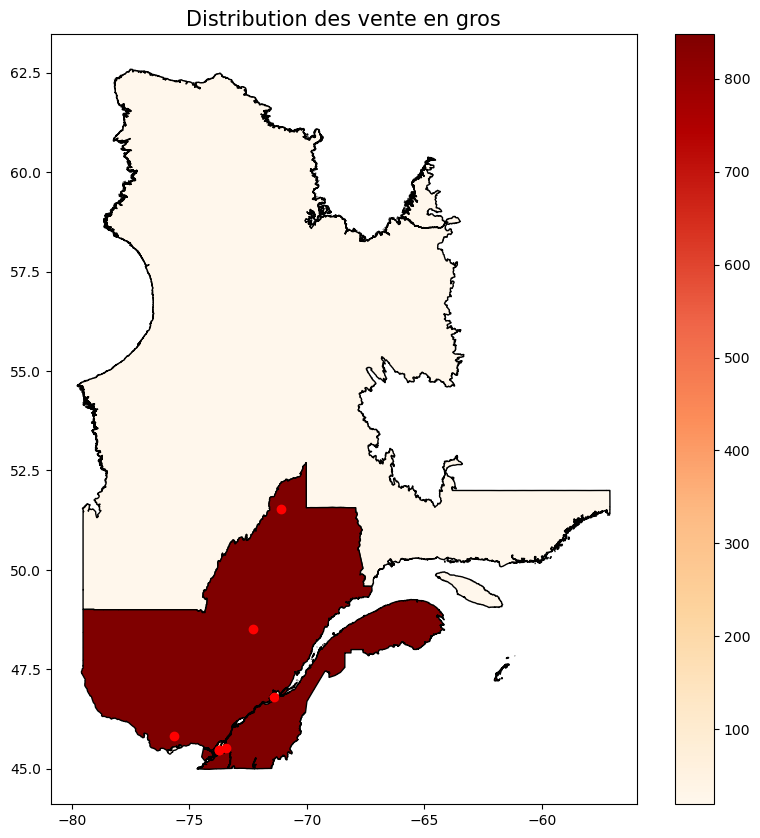

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
grouped.plot(column = "Vente en gros", ax=ax, cmap='OrRd', edgecolor='black',legend=True)
# Add title and remove axes
coors_stations = quebec_stations_reference[["lat","lon"]]
ax.set_title('Distribution des vente en gros', fontsize=15)
ax.scatter(coor_filter["lon"], coor_filter["lat"], color = "r", label = "Chosen stations")


# ax.set_axis_off()
# plt.show()



### importer les donnees de consommation des archetypes pour chaque fichier climatique

In [165]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
print(sqlite3.sqlite_version)

def query_eletricity(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    print(db_path)

    # Query to fetch the entire dataset for "Electricity:Facility"
    query_full_data = """
    SELECT TimeIndex, Value 
    FROM ReportData 
    WHERE ReportDataDictionaryIndex IN (
        SELECT ReportDataDictionaryIndex 
        FROM ReportDataDictionary 
        WHERE Name = 'ElectricityNet:Facility'
    );
    """

    # Execute the query and fetch the data
    cursor.execute(query_full_data)
    full_data = cursor.fetchall()
    # Create a DataFrame from the data
    full_df = pd.DataFrame(full_data, columns=['TimeIndex', 'Value (Joules)'])
    cursor.close()
    return full_df

# Plot the data
"""
plt.figure(figsize=(14, 7))
plt.plot(full_df['TimeIndex'], full_df['Value (Joules)'], alpha=0.7, linestyle='-')
plt.title("Electricity:Facility Usage Over Time (Full Dataset)", fontsize=16)
plt.xlabel("Time Index", fontsize=14)
plt.ylabel("Electricity Usage (Joules)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
"""

3.41.2


'\nplt.figure(figsize=(14, 7))\nplt.plot(full_df[\'TimeIndex\'], full_df[\'Value (Joules)\'], alpha=0.7, linestyle=\'-\')\nplt.title("Electricity:Facility Usage Over Time (Full Dataset)", fontsize=16)\nplt.xlabel("Time Index", fontsize=14)\nplt.ylabel("Electricity Usage (Joules)", fontsize=14)\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

In [180]:
db_path_1 = [("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_HI_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql", 5),
("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_LA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql", 0), 
("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_MONTREA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql", 3),
             ("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_MONTREA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql", 4),  
("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_MONTREAL-S_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql",2), 
("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_QUEBE_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql",6),
("D:\\PI4_main\\ARCH_etablissements_alimentaires\\commerce_basic_generation\\results\\in.osm\\CAN_QC_RO_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\\run\\eplusout.sql",1)]

In [181]:
data_array = []
for elements in db_path_1:
    data_array.append(query_eletricity(elements[0]))

D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_HI_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\run\eplusout.sql
D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_LA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\run\eplusout.sql
D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_MONTREA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\run\eplusout.sql
D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_MONTREA_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\run\eplusout.sql
D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_MONTREAL-S_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\run\eplusout.sql
D:\PI4_main\ARCH_etablissements_alimentaires\commerce_basic_generation\results\in.osm\CAN_QC_QUEBE_1cd34e7d-461f-4554-b970-c1d53a70670schedule_change_r\

In [187]:
data_array[0]

,TimeIndex,Value (Joules)
0,6,1.499417e+08
1,12,1.312948e+08
2,18,1.444971e+08
3,24,1.538496e+08
4,30,1.649458e+08
...,...,...
8755,52536,6.364801e+08
8756,52542,6.459024e+08
8757,52548,6.447012e+07
8758,52554,1.425008e+08


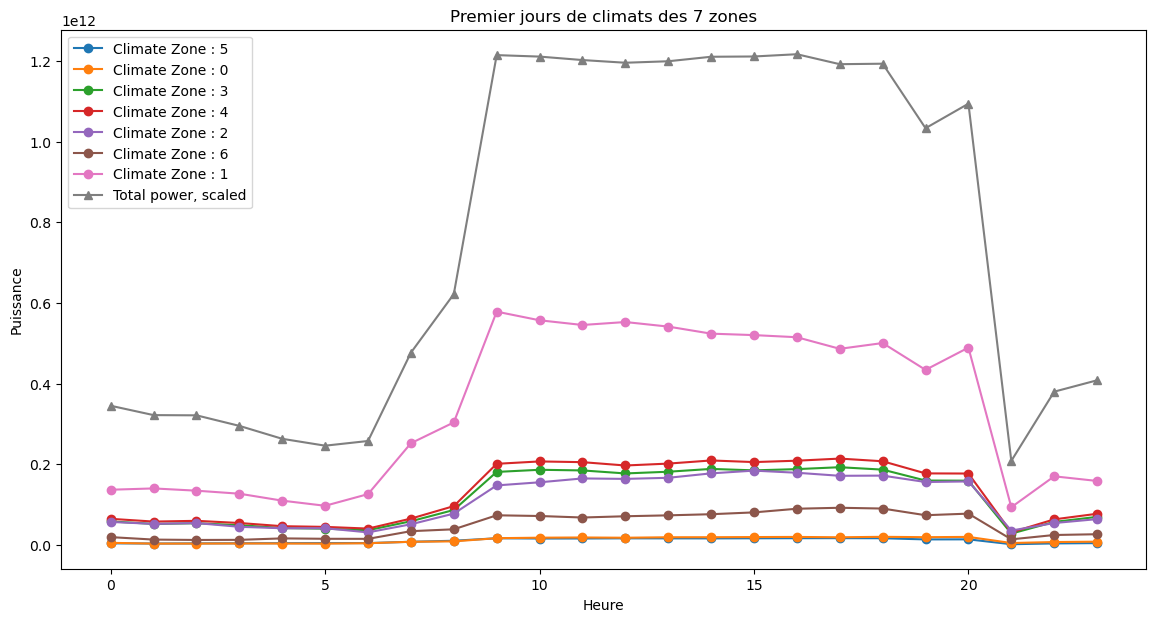

In [207]:
plt.figure(figsize=(14, 7))

total_power = 0
for i in range(0,7):
    power_data_scaled = grouped[grouped["Zone"] == db_path_1[i][1]]["Vente en gros"].values * data_array[i]['Value (Joules)']
    plt.plot(power_data_scaled[:24], label = f"Climate Zone : {db_path_1[i][1]}", marker="o")
    total_power += power_data_scaled
    
plt.plot(total_power[:24], label = "Total power, scaled", marker="^")    
plt.title('Premier jours de climats des 7 zones')  # Set the title of the histogram
plt.xlabel('Heure')  # Optionally, add x-axis label
plt.ylabel('Puissance')  # Optionally, add y-axis label
plt.legend()
    
plt.legend()

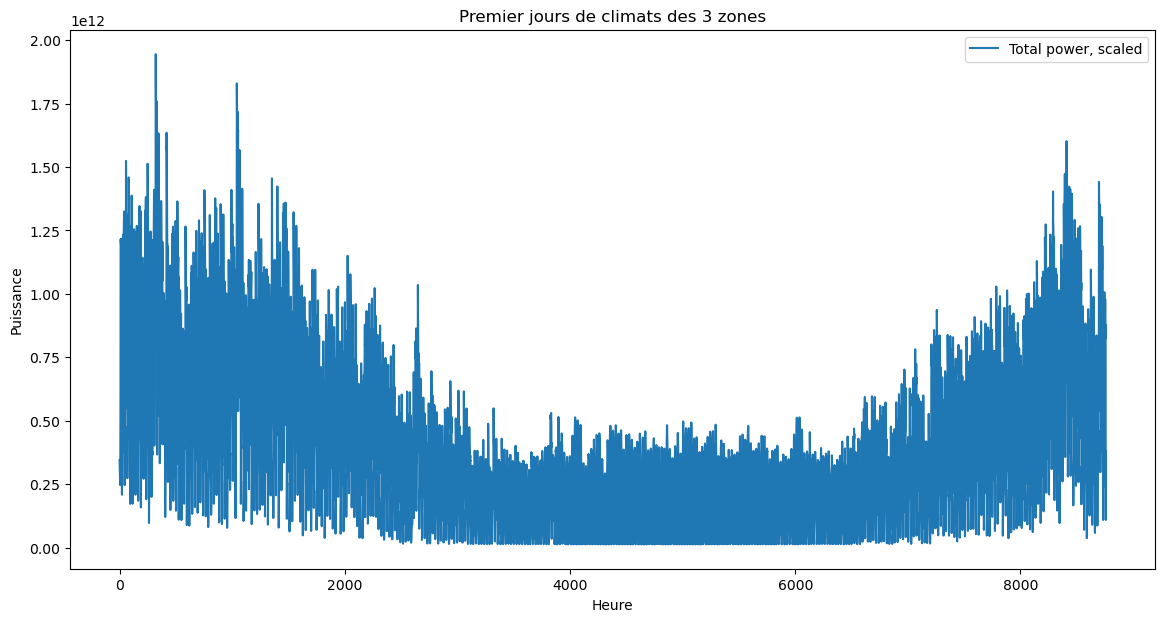

In [208]:
plt.figure(figsize=(14, 7))

plt.plot(total_power, label = "Total power, scaled")    
plt.title('Premier jours de climats des 7 zones')  # Set the title of the histogram
plt.xlabel('Heure')  # Optionally, add x-axis label
plt.ylabel('Puissance')  # Optionally, add y-axis label
plt.legend()
    
plt.title('Premier jours de climats des 3 zones')  # Set the title of the histogram
plt.xlabel('Heure')  # Optionally, add x-axis label
plt.ylabel('Puissance')  # Optionally, add y-axis label
plt.legend()

In [191]:
grouped[grouped["Zone"] == i]["Vente en gros"].values

array([19], dtype=int64)

In [139]:
id_strings = np.array(quebec_stations_reference.loc[coor_filter.index]["climate_ID"])

In [140]:
id_strings

array(['706I001', '7066686', '7027329', '7025251', '7025251', '7033121',
       '7016293'], dtype=object)

In [141]:
quebec_stations_reference.loc[coor_filter.index]

,version,name,prov,country,climate_ID,lat,lon,UTC_offset,elev(m),first_yr,last_yr
462,CWEEDS2011,LAC BENOIT,QC,CAN,706I001,51.53,-71.11,-5,549.0,1998,2017
493,CWEEDS2011,ROBERVAL A,QC,CAN,7066686,48.52,-72.27,-5,178.6,1998,2017
479,CWEEDS2011,MONTREAL-ST-HUBERT,QC,CAN,7027329,45.52,-73.42,-5,27.4,1998,2017
477,CWEEDS2011,MONTREAL INTL A,QC,CAN,7025251,45.47,-73.74,-5,36.0,1998,2017
477,CWEEDS2011,MONTREAL INTL A,QC,CAN,7025251,45.47,-73.74,-5,36.0,1998,2017
448,CWEEDS2011,HIGH FALLS,QC,CAN,7033121,45.84,-75.65,-5,194.6,2000,2017
491,CWEEDS2011,QUEBEC INTL A,QC,CAN,7016293,46.80,-71.38,-5,74.4,1998,2017


In [142]:
grouped
### next time I need to couple the weather index to the file in question

,Zone,geometry,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Vente en gros,weather_index
0,0,"MULTIPOLYGON (((-79.50622 51.56252, -79.50585 ...",2497,Sept-Rivières--Caniapiscau,CDR,24,Quebec / Québec,19,462
1,1,"MULTIPOLYGON (((-74.63859 44.99977, -74.63873 ...",2447,La Haute-Yamaska,MRC,24,Quebec / Québec,848,493
2,2,"MULTIPOLYGON (((-73.49832 45.43373, -73.49831 ...",2458,Longueuil,TÉ,24,Quebec / Québec,146,479
3,3,"MULTIPOLYGON (((-73.84984 45.51504, -73.85015 ...",2465,Laval,TÉ,24,Quebec / Québec,153,477
4,4,"MULTIPOLYGON (((-73.66746 45.4309, -73.66878 4...",2466,Montréal,TÉ,24,Quebec / Québec,170,477
5,5,"POLYGON ((-75.35508 45.59611, -75.3531 45.5861...",2481,Gatineau,TÉ,24,Quebec / Québec,26,448
6,6,"POLYGON ((-71.1726 46.90513, -71.17218 46.9044...",2423,Québec,TÉ,24,Quebec / Québec,128,491
